In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv(r'/content/drive/MyDrive/train.xls.csv')
pd.set_option('display.max_columns', 300)
dataset.head()

id   timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0   1  2011-08-20       43     27.0    4.0        NaN       NaN         NaN   
1   2  2011-08-23       34     19.0    3.0        NaN       NaN         NaN   
2   3  2011-08-27       43     29.0    2.0        NaN       NaN         NaN   
3   4  2011-09-01       89     50.0    9.0        NaN       NaN         NaN   
4   5  2011-09-05       77     77.0    4.0        NaN       NaN         NaN   

   num_room  kitch_sq  state product_type           sub_area        area_m  \
0       NaN       NaN    NaN   Investment           Bibirevo  6.407578e+06   
1       NaN       NaN    NaN   Investment  Nagatinskij Zaton  9.589337e+06   
2       NaN       NaN    NaN   Investment     Tekstil'shhiki  4.808270e+06   
3       NaN       NaN    NaN   Investment             Mitino  1.258354e+07   
4       NaN       NaN    NaN   Investment          Basmannoe  8.398461e+06   

   raion_popul  green_zone_part  indust_part  children_preschool  \
0       155572         0.189727     0.000070                9576   
1       115352         0.372602     0.049637                6880   
2       101708         0.112560     0.118537                5879   
3       178473         0.194703     0.069753               13087   
4       108171         0.015234     0.037316                5706   

   preschool_quota  preschool_education_centers_raion  children_school  \
0           5001.0                                  5            10309   
1           3119.0                                  5             7759   
2           1463.0                                  4             6207   
3           6839.0                                  9            13670   
4           3240.0                                  7             6748   

   school_quota  school_education_centers_raion  \
0       11065.0                               5   
1        6237.0                               8   
2        5580.0                               7   
3       17063.0                              10   
4        7770.0                               9   

   school_education_centers_top_20_raion  hospital_beds_raion  \
0                                      0                240.0   
1                                      0                229.0   
2                                      0               1183.0   
3                                      0                  NaN   
4                                      0                562.0   

   healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
0                         1                        0                    7   
1                         1                        0                    6   
2                         1                        0                    5   
3                         1                        0                   17   
4                         4                        2                   25   

   additional_education_raion culture_objects_top_25  \
0                           3                     no   
1                           1                    yes   
2                           1                     no   
3                           6                     no   
4                           2                     no   

   culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
0                             0                      16             1   
1                             1                       3             0   
2                             0                       0             1   
3                             0                      11             4   
4                             0                      10            93   

  thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
0                        no                 no                  no   
1                        no                 no                  no   
2                        no                 no            

In [4]:
dataset.shape

(30471, 292)

# Exploratory Data Analysis

In [5]:
pd.set_option('display.max_rows', 300)
dataset.isnull().sum()

id                                           0
timestamp                                    0
full_sq                                      0
life_sq                                   6383
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               13605
num_room                                  9572
kitch_sq                                  9572
state                                    13559
product_type                                 0
sub_area                                     0
area_m                                       0
raion_popul                                  0
green_zone_part                              0
indust_part                                  0
children_preschool                           0
preschool_quota                           6688
preschool_education_centers_raion            0
children_school                              0
school_quota 

In [6]:
dataset.dtypes

id                                         int64
timestamp                                 object
full_sq                                    int64
life_sq                                  float64
floor                                    float64
max_floor                                float64
material                                 float64
build_year                               float64
num_room                                 float64
kitch_sq                                 float64
state                                    float64
product_type                              object
sub_area                                  object
area_m                                   float64
raion_popul                                int64
green_zone_part                          float64
indust_part                              float64
children_preschool                         int64
preschool_quota                          float64
preschool_education_centers_raion          int64
children_school     

In [7]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])
dataset['year'] = dataset['timestamp'].dt.year

In [8]:
dataset.drop(['id','timestamp','sub_area'],axis=1,inplace=True)

In [9]:
numerical_feature = [feature for feature in dataset.columns if dataset[feature].dtypes != "O"]
numerical_feature


['full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all',
 'ekder_male',
 'ekder_female',
 '0_6_all',
 '0_6_male',
 '0_6_female',
 '7_14_all',
 '7_14_male',
 '7_14_female',
 '0_17_all',
 '0_17_male',
 '0_17_female',
 '16_29_all',
 '16_29_male',
 '16_29_female',
 '0_13_all',
 '0_13_male',
 '0_13_female',
 'raion_build_count_with_mater

In [10]:
for feature in numerical_feature:
    print("{} has null values :   {}".format(feature,dataset[feature].isnull().sum()))

full_sq has null values :   0
life_sq has null values :   6383
floor has null values :   167
max_floor has null values :   9572
material has null values :   9572
build_year has null values :   13605
num_room has null values :   9572
kitch_sq has null values :   9572
state has null values :   13559
area_m has null values :   0
raion_popul has null values :   0
green_zone_part has null values :   0
indust_part has null values :   0
children_preschool has null values :   0
preschool_quota has null values :   6688
preschool_education_centers_raion has null values :   0
children_school has null values :   0
school_quota has null values :   6685
school_education_centers_raion has null values :   0
school_education_centers_top_20_raion has null values :   0
hospital_beds_raion has null values :   14441
healthcare_centers_raion has null values :   0
university_top_20_raion has null values :   0
sport_objects_raion has null values :   0
additional_education_raion has null values :   0
culture_o

In [11]:
categorical_feature = [feature for feature in dataset.columns if dataset[feature].dtypes == "O"]
categorical_feature

['product_type',
 'culture_objects_top_25',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'water_1line',
 'big_road1_1line',
 'railroad_1line',
 'ecology']

In [12]:
for feature in categorical_feature:
    print("{} has categorical features :   {}".format(feature,len(dataset[feature].unique())))

product_type has categorical features :   2
culture_objects_top_25 has categorical features :   2
thermal_power_plant_raion has categorical features :   2
incineration_raion has categorical features :   2
oil_chemistry_raion has categorical features :   2
radiation_raion has categorical features :   2
railroad_terminal_raion has categorical features :   2
big_market_raion has categorical features :   2
nuclear_reactor_raion has categorical features :   2
detention_facility_raion has categorical features :   2
water_1line has categorical features :   2
big_road1_1line has categorical features :   2
railroad_1line has categorical features :   2
ecology has categorical features :   5


In [13]:
for feature in categorical_feature:
    print("{} has null values :   {}".format(feature,dataset[feature].isnull().sum()))

product_type has null values :   0
culture_objects_top_25 has null values :   0
thermal_power_plant_raion has null values :   0
incineration_raion has null values :   0
oil_chemistry_raion has null values :   0
radiation_raion has null values :   0
railroad_terminal_raion has null values :   0
big_market_raion has null values :   0
nuclear_reactor_raion has null values :   0
detention_facility_raion has null values :   0
water_1line has null values :   0
big_road1_1line has null values :   0
railroad_1line has null values :   0
ecology has null values :   0


In [14]:
continuous_feature = [feature for feature in numerical_feature if len(dataset[feature].unique()) > 40]
continuous_feature

['full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'build_year',
 'kitch_sq',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'children_school',
 'school_quota',
 'hospital_beds_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all',
 'ekder_male',
 'ekder_female',
 '0_6_all',
 '0_6_male',
 '0_6_female',
 '7_14_all',
 '7_14_male',
 '7_14_female',
 '0_17_all',
 '0_17_male',
 '0_17_female',
 '16_29_all',
 '16_29_male',
 '16_29_female',
 '0_13_all',
 '0_13_male',
 '0_13_female',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_brick',
 'build_count_panel',
 'raion_build_count_with_builddate_info',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'ID_metro',
 'metro_min_avto',
 'metro_km_avto',
 'metro_min_walk',
 'metro_km_walk',
 'kindergarten_km',
 'school_

In [15]:
discrete_feature = [feature for feature in numerical_feature if len(dataset[feature].unique()) <= 40]
discrete_feature

['material',
 'num_room',
 'state',
 'preschool_education_centers_raion',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'build_count_wood',
 'build_count_frame',
 'build_count_monolith',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'build_count_before_1920',
 'ID_railroad_terminal',
 'ID_bus_terminal',
 'office_count_500',
 'trc_count_500',
 'cafe_count_500_na_price',
 'cafe_count_500_price_500',
 'cafe_count_500_price_1000',
 'cafe_count_500_price_1500',
 'cafe_count_500_price_2500',
 'cafe_count_500_price_4000',
 'cafe_count_500_price_high',
 'big_church_count_500',
 'church_count_500',
 'mosque_count_500',
 'leisure_count_500',
 'sport_count_500',
 'market_count_500',
 'trc_count_1000',
 'cafe_count_1000_na_price',
 'cafe_count_1000_price_4000',
 '

In [16]:
for feature in discrete_feature:
    print("{} feature has null values : {}".format(feature,dataset[feature].isnull().sum()))

material feature has null values : 9572
num_room feature has null values : 9572
state feature has null values : 13559
preschool_education_centers_raion feature has null values : 0
school_education_centers_raion feature has null values : 0
school_education_centers_top_20_raion feature has null values : 0
healthcare_centers_raion feature has null values : 0
university_top_20_raion feature has null values : 0
sport_objects_raion feature has null values : 0
additional_education_raion feature has null values : 0
culture_objects_top_25_raion feature has null values : 0
shopping_centers_raion feature has null values : 0
office_raion feature has null values : 0
build_count_wood feature has null values : 4991
build_count_frame feature has null values : 4991
build_count_monolith feature has null values : 4991
build_count_foam feature has null values : 4991
build_count_slag feature has null values : 4991
build_count_mix feature has null values : 4991
build_count_before_1920 feature has null value

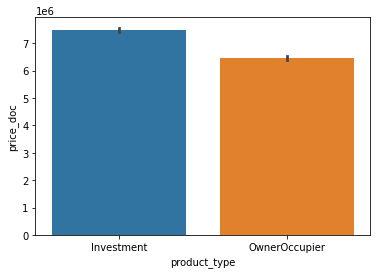

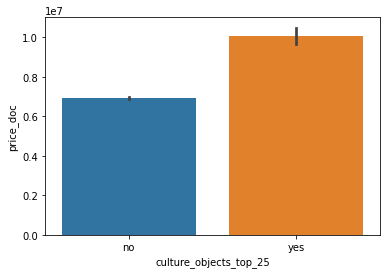

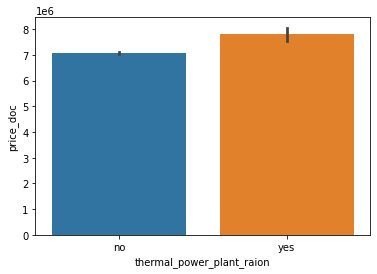

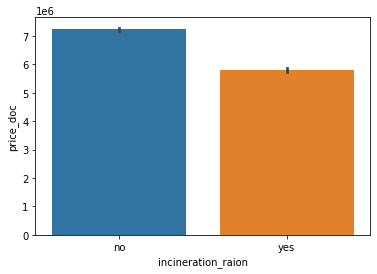

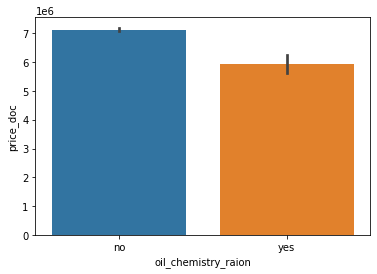

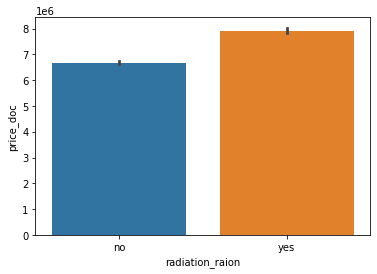

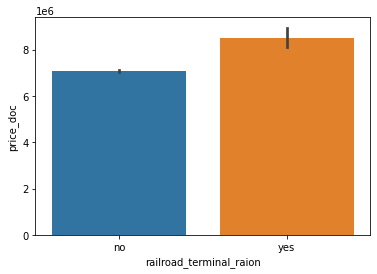

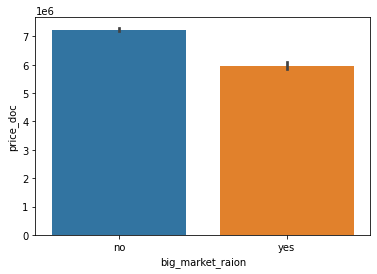

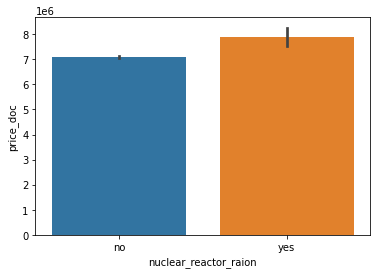

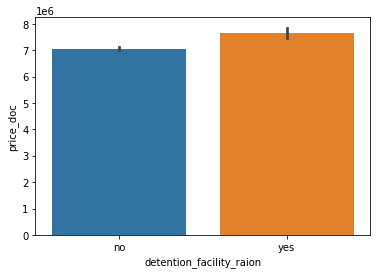

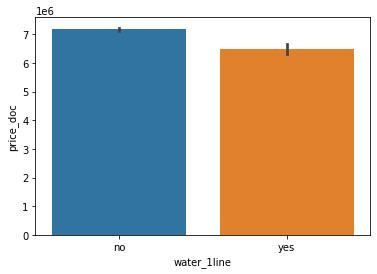

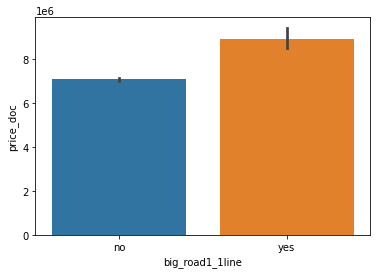

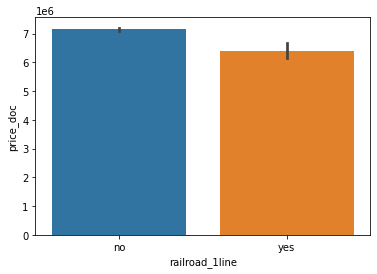

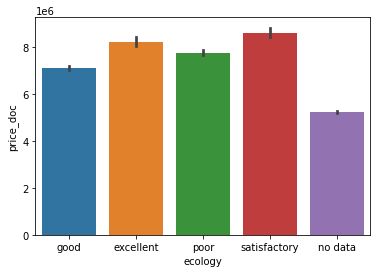

In [17]:
for feature in categorical_feature:
    sns.barplot(x = dataset[feature],y = dataset['price_doc'])
    plt.xlabel(feature)
    plt.ylabel('price_doc')
    plt.show()


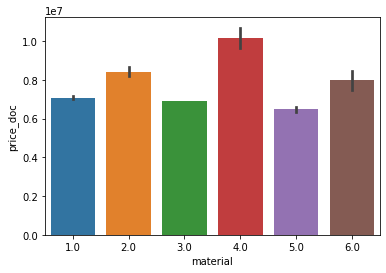

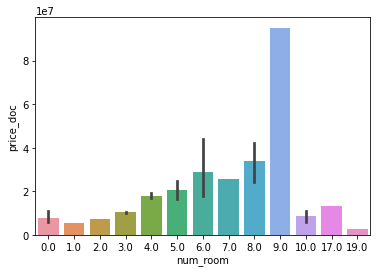

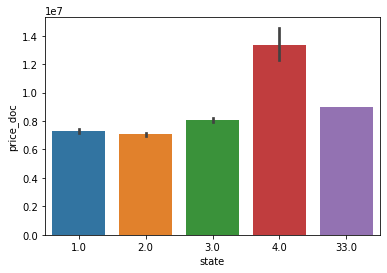

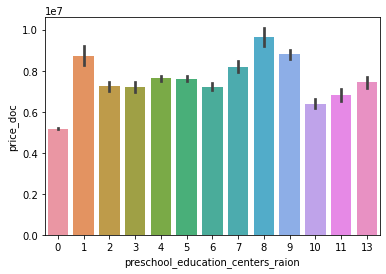

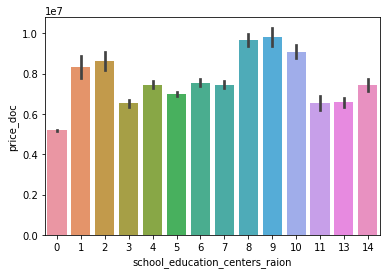

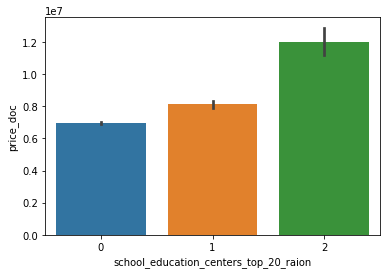

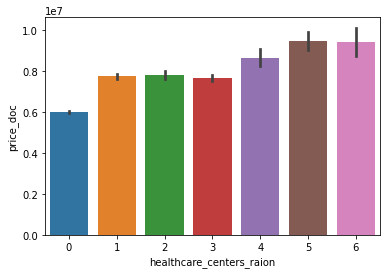

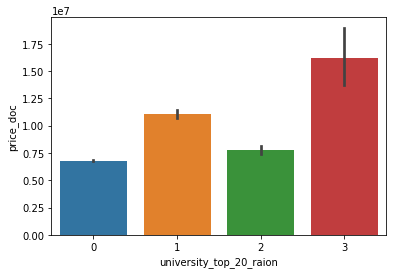

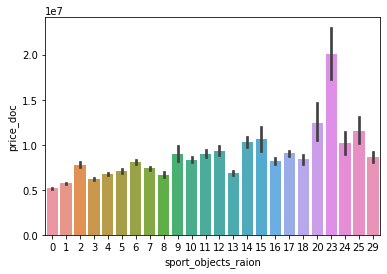

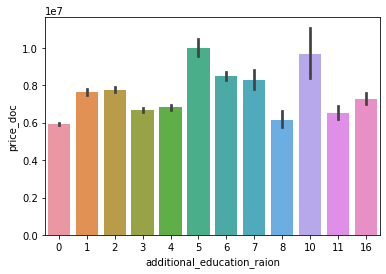

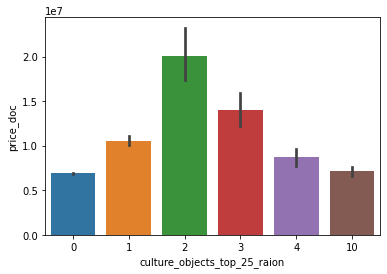

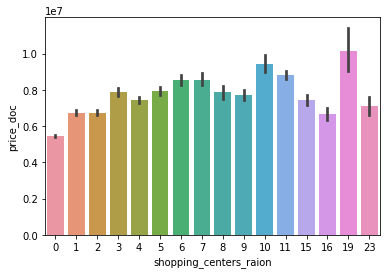

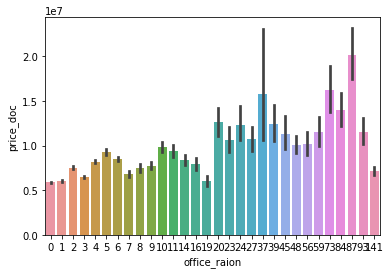

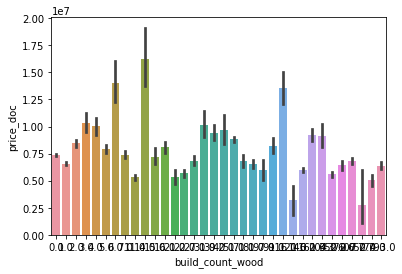

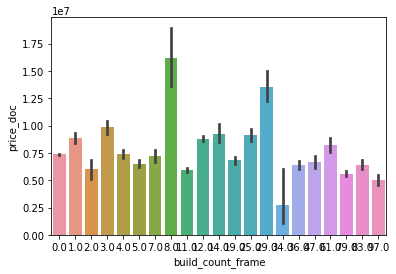

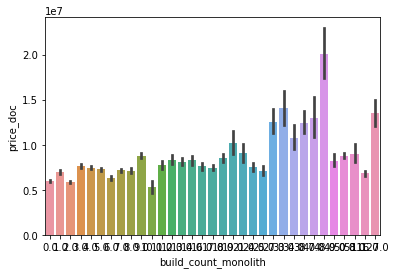

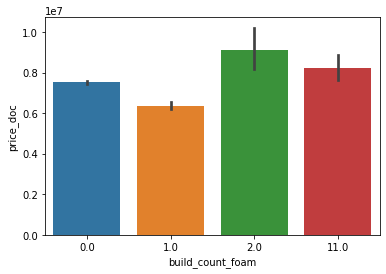

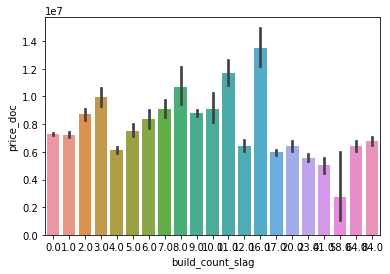

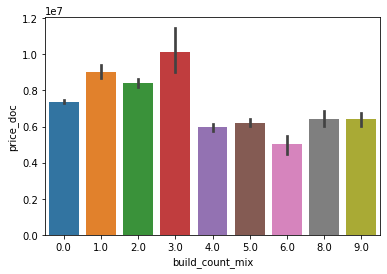

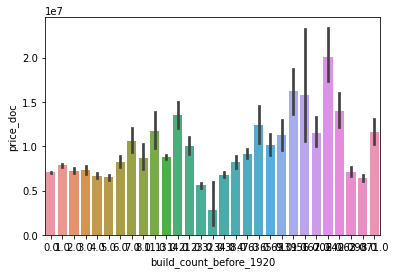

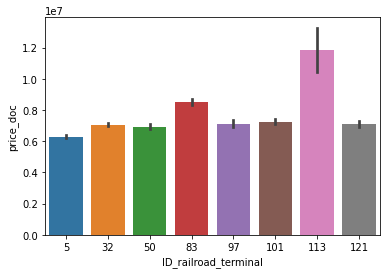

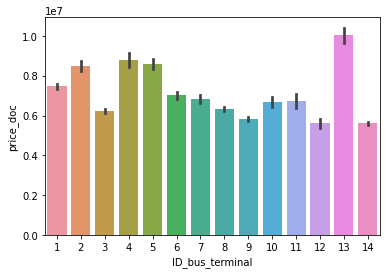

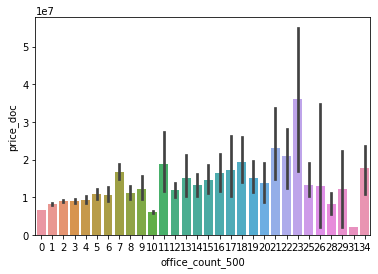

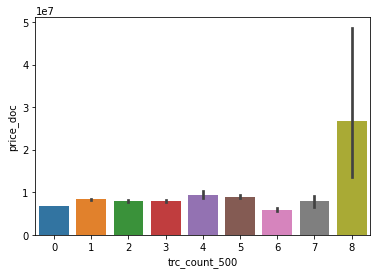

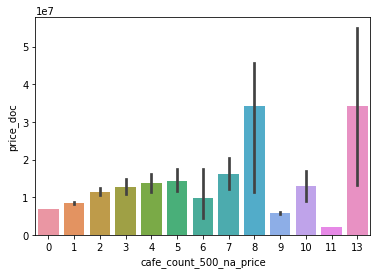

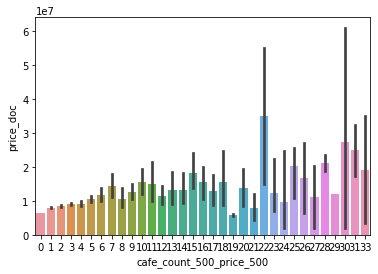

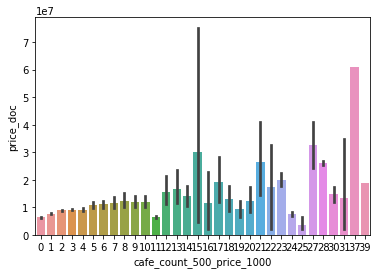

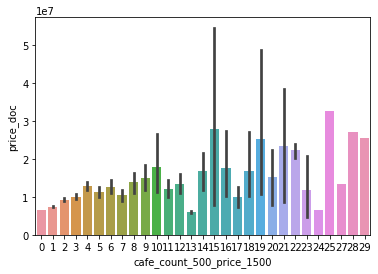

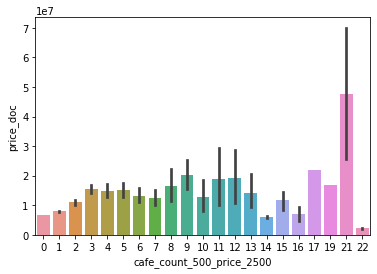

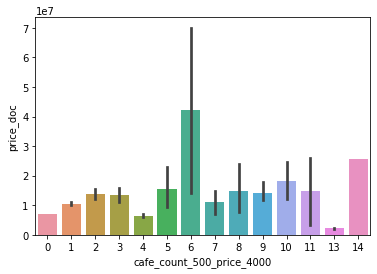

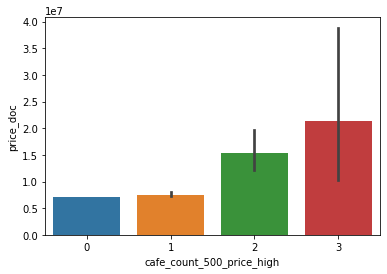

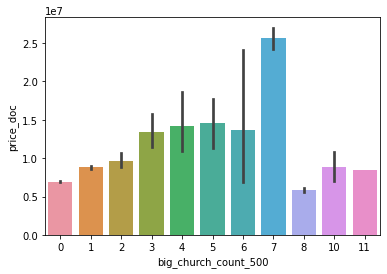

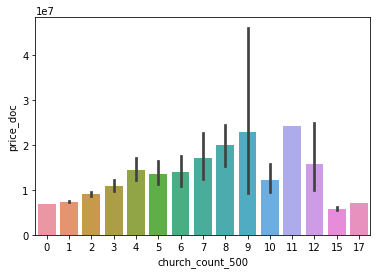

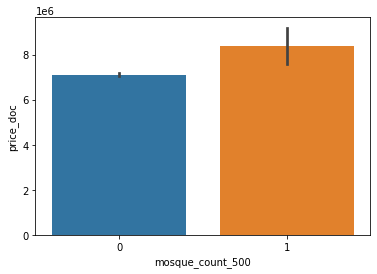

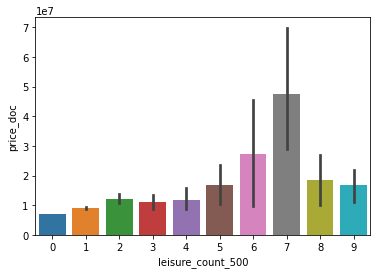

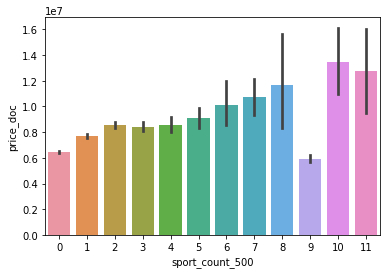

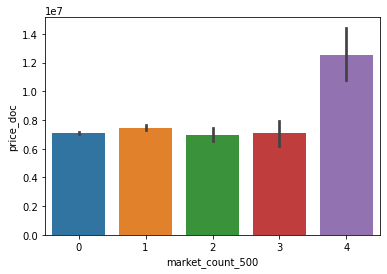

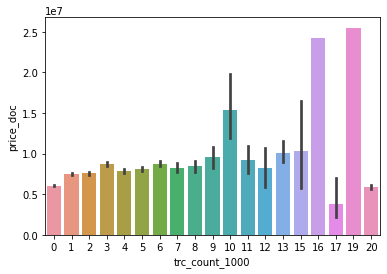

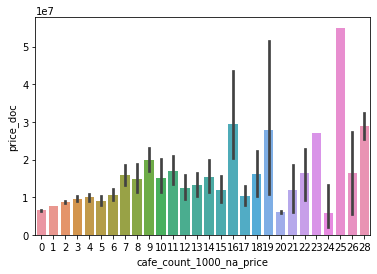

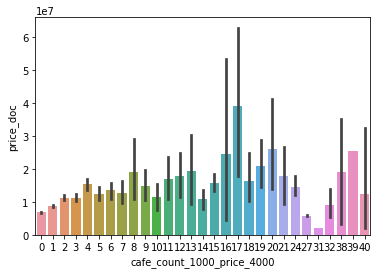

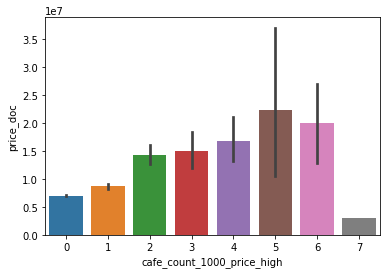

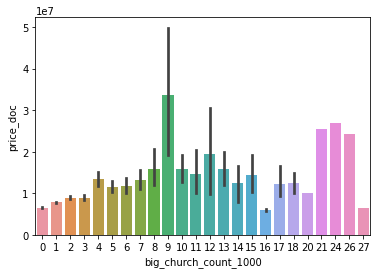

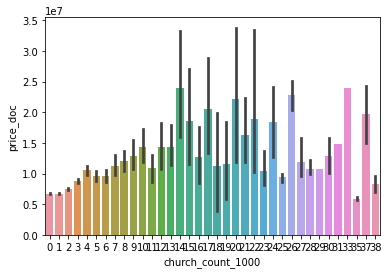

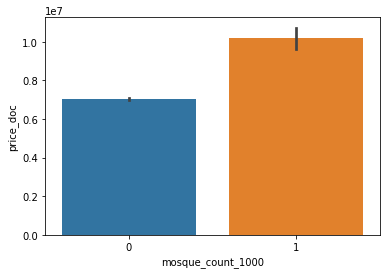

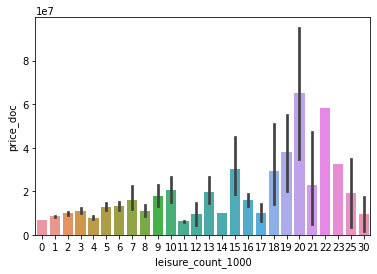

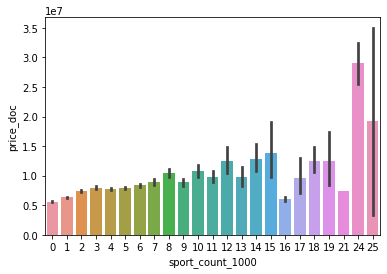

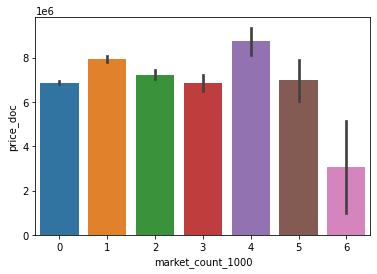

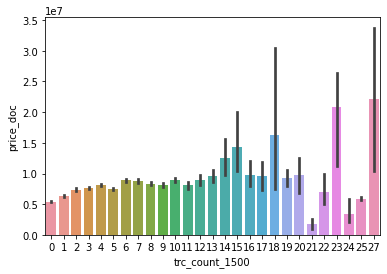

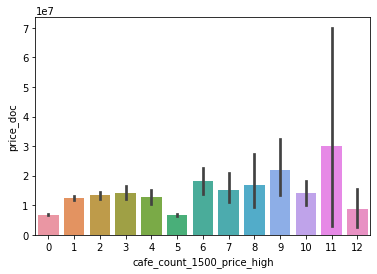

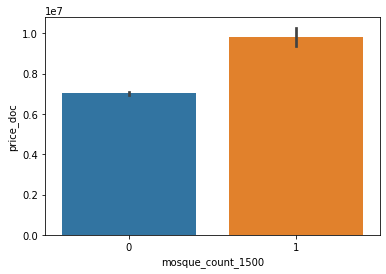

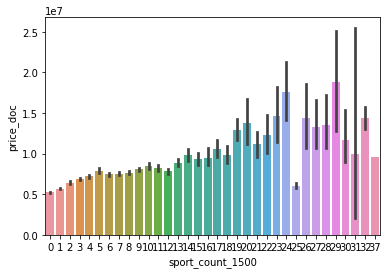

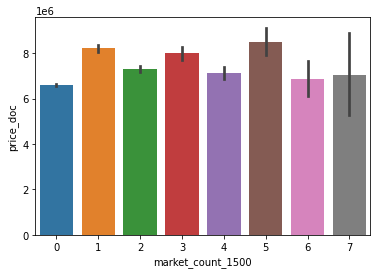

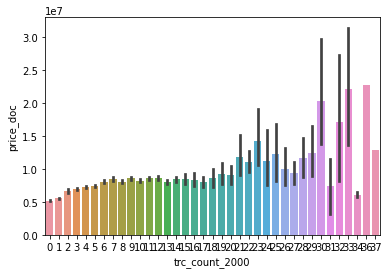

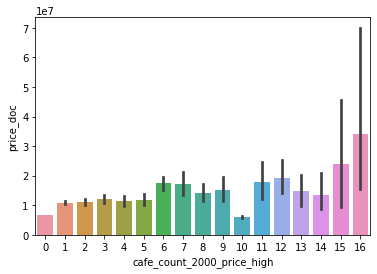

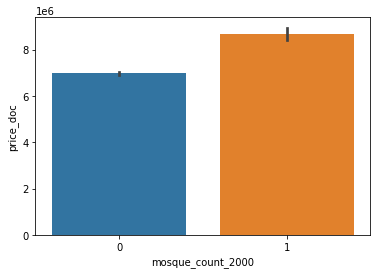

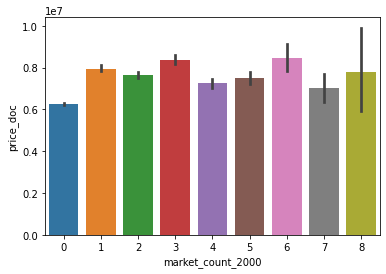

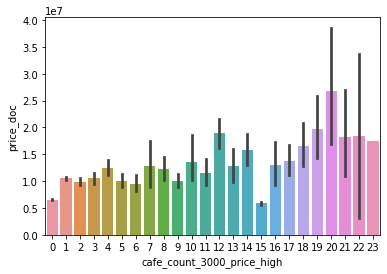

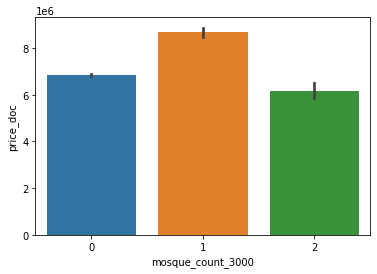

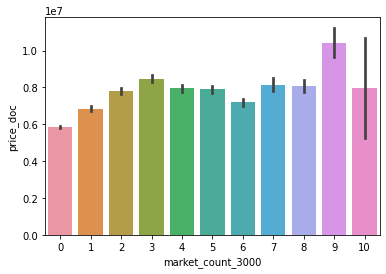

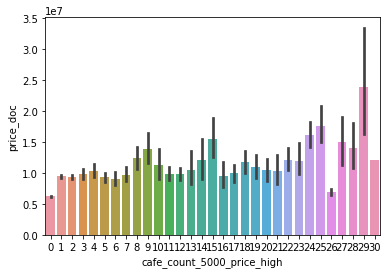

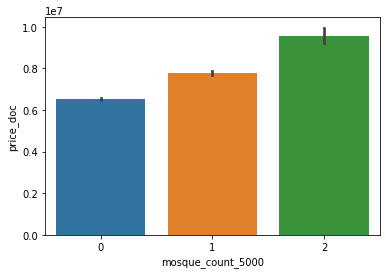

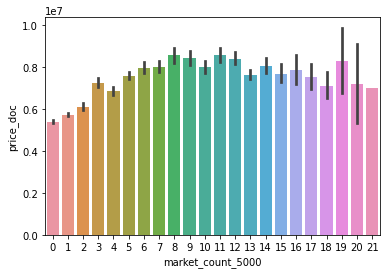

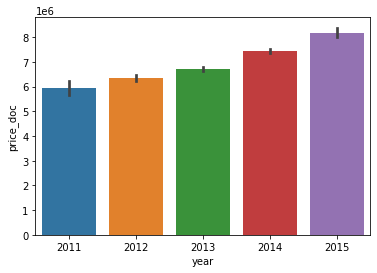

In [18]:
for feature in discrete_feature:
    sns.barplot(x = dataset[feature],y = dataset['price_doc'])
    plt.xlabel(feature)
    plt.ylabel('price_doc')
    plt.show()


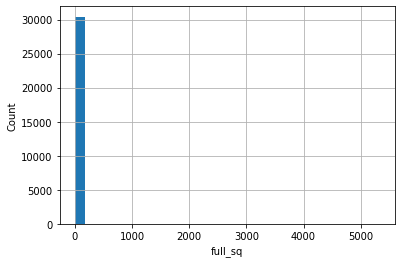

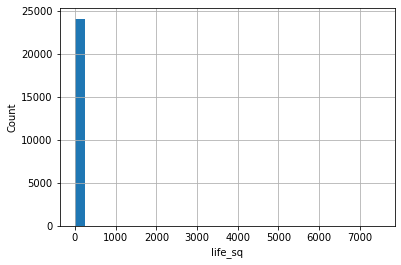

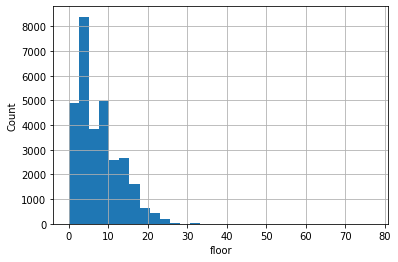

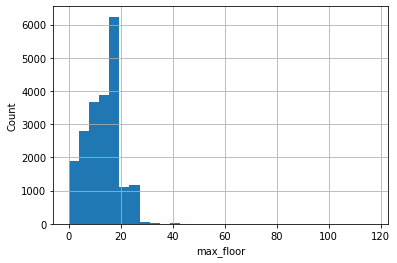

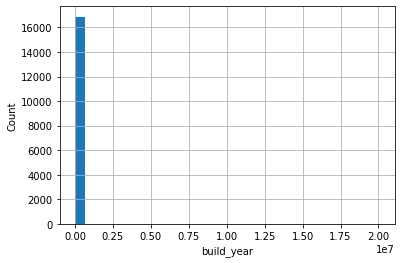

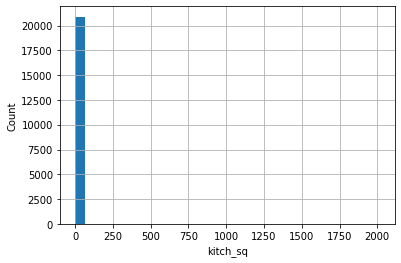

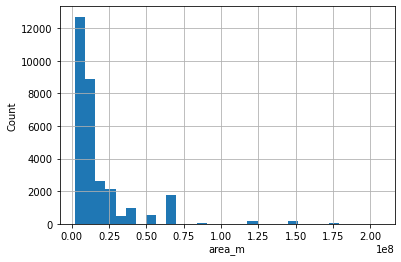

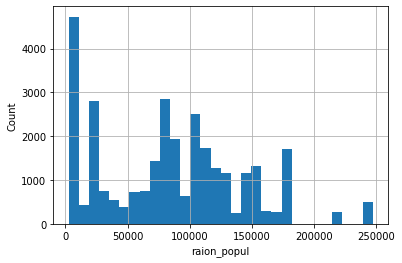

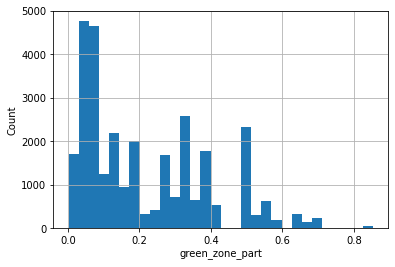

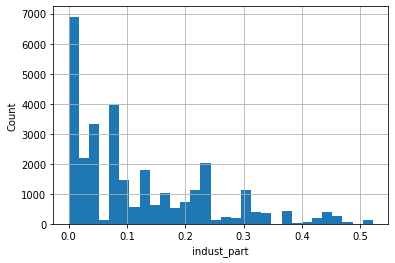

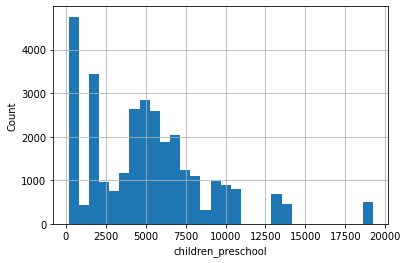

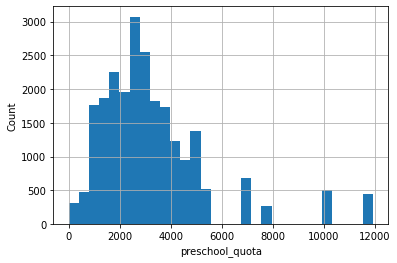

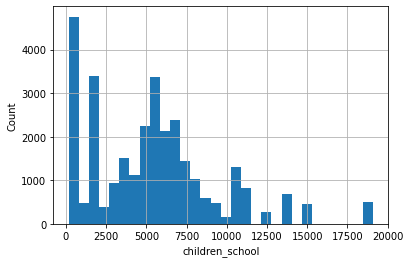

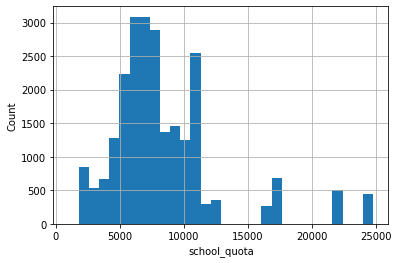

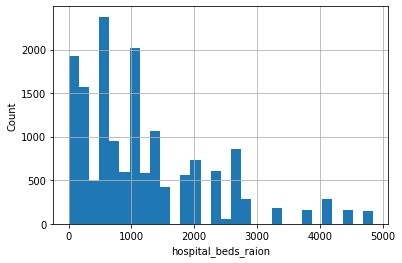

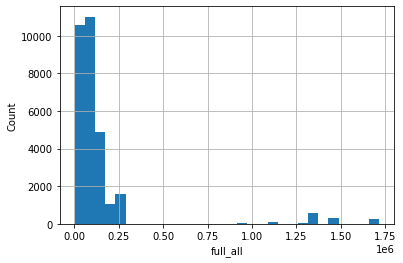

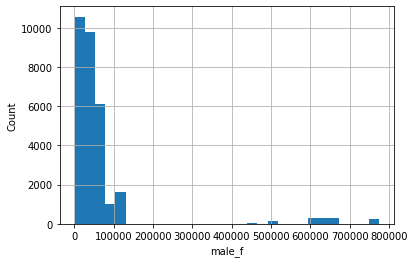

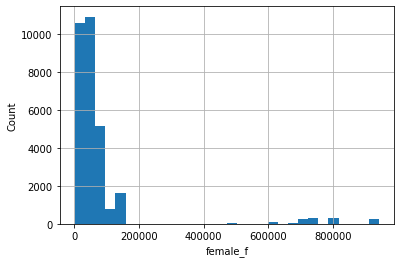

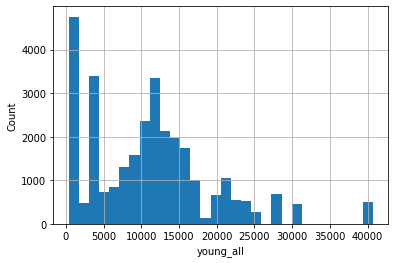

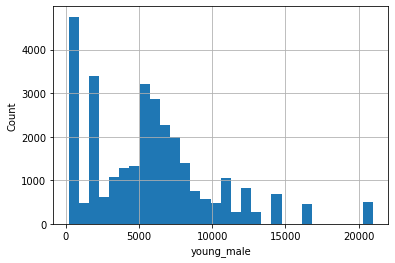

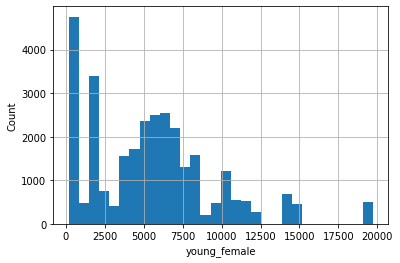

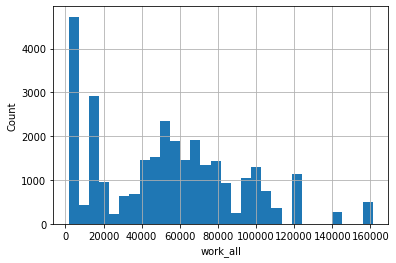

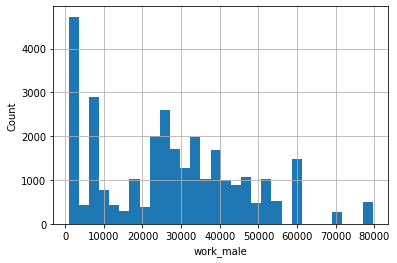

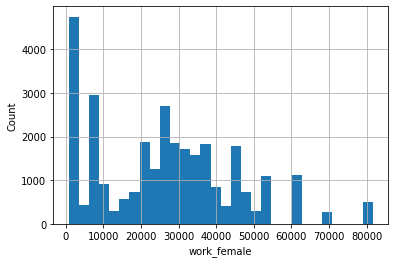

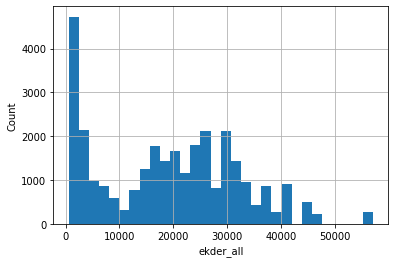

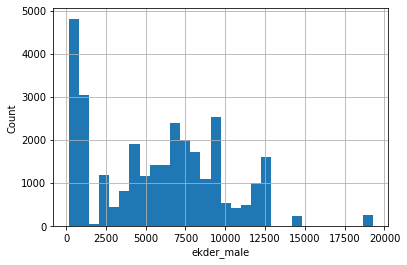

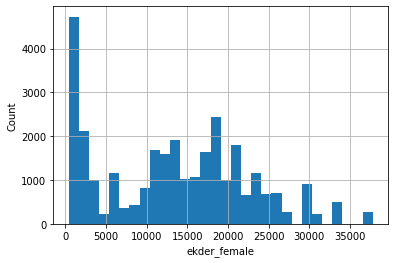

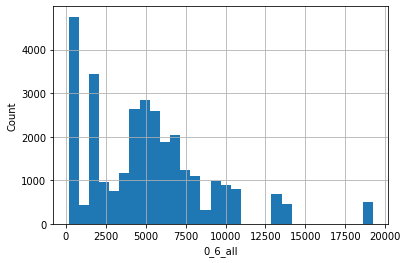

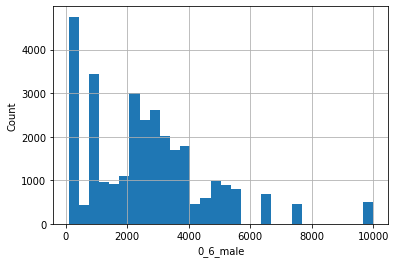

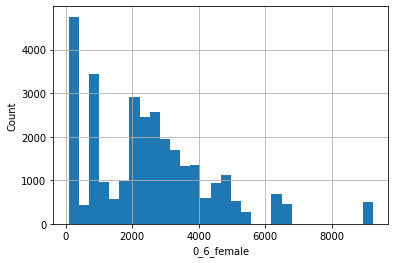

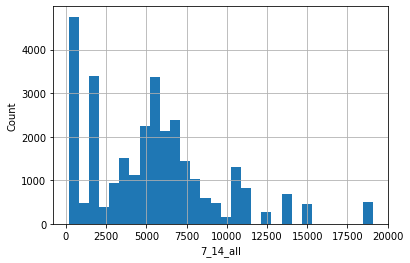

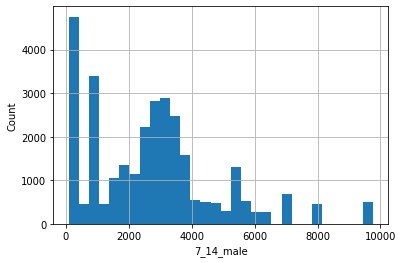

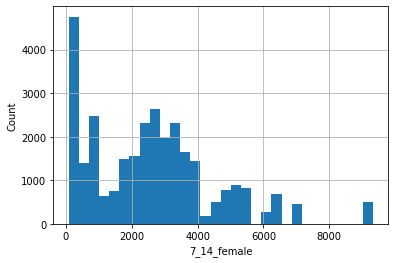

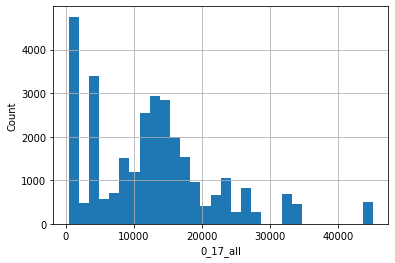

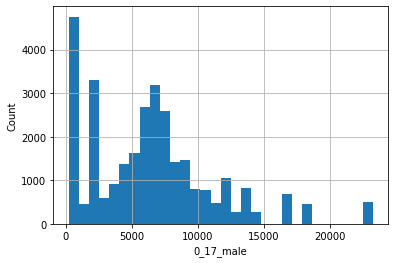

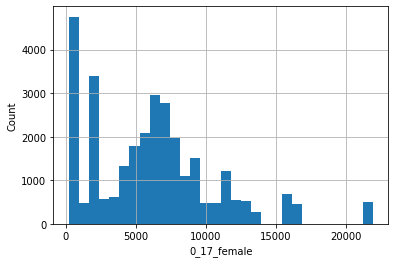

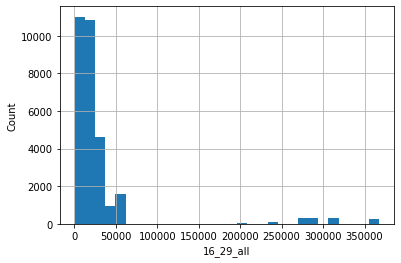

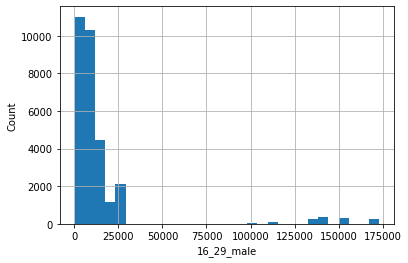

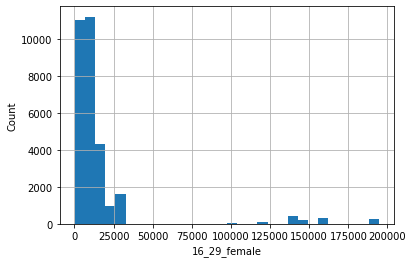

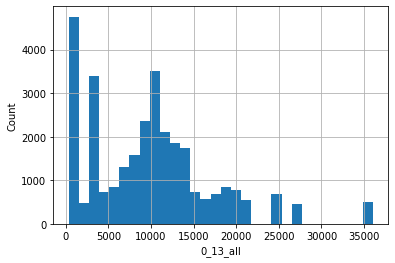

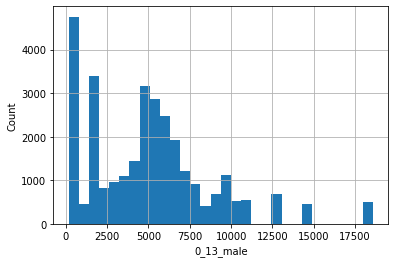

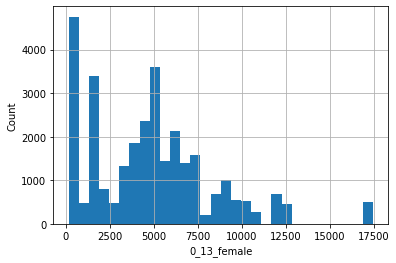

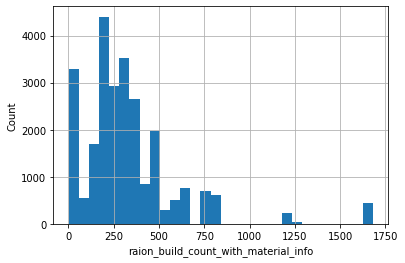

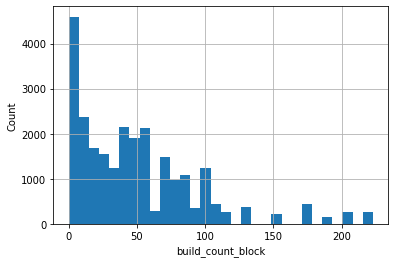

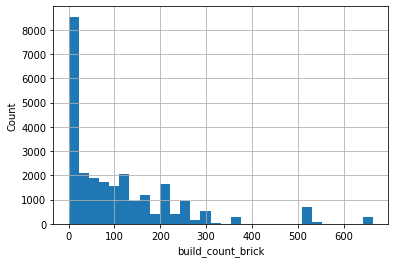

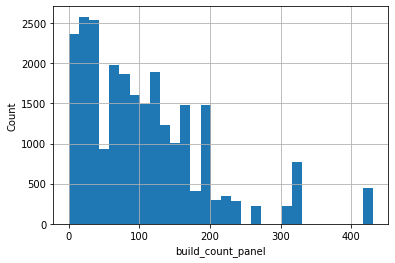

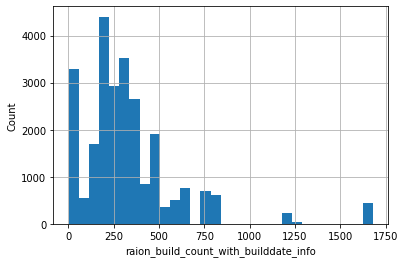

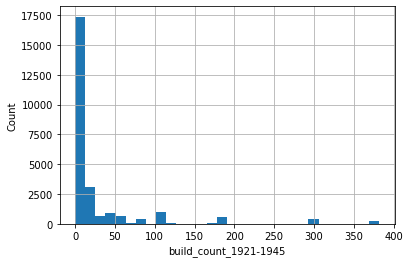

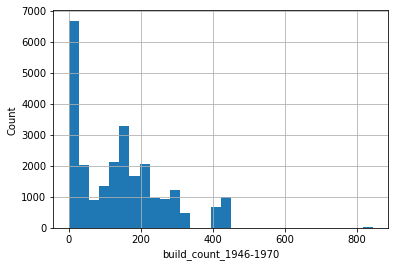

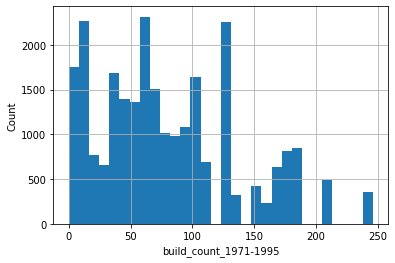

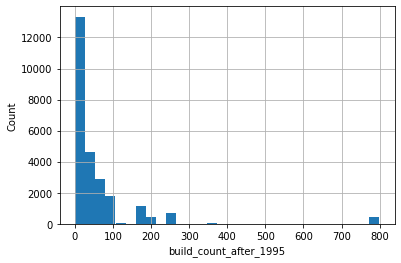

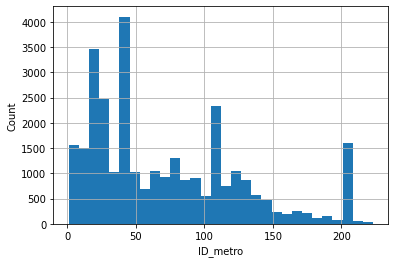

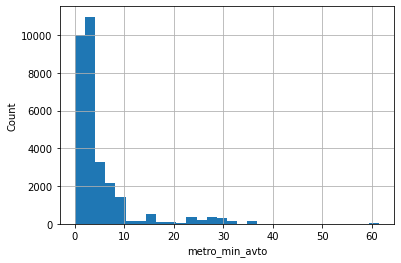

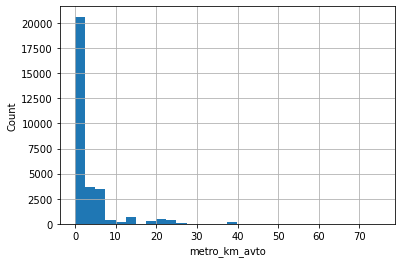

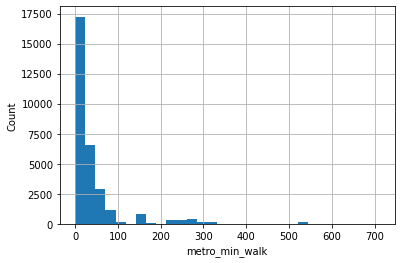

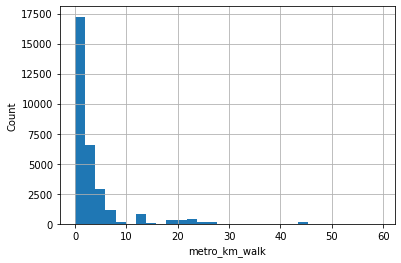

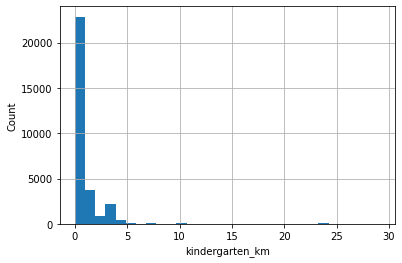

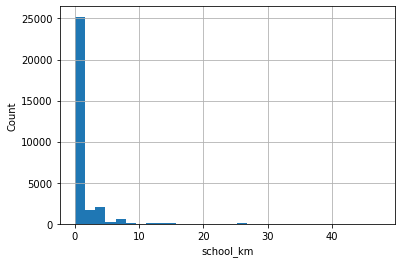

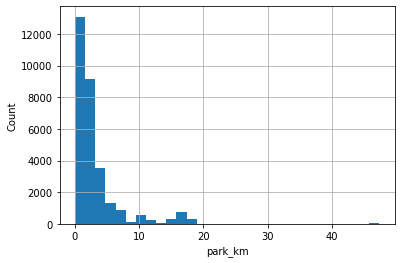

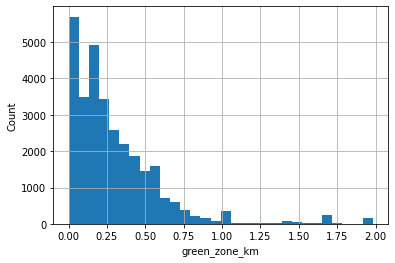

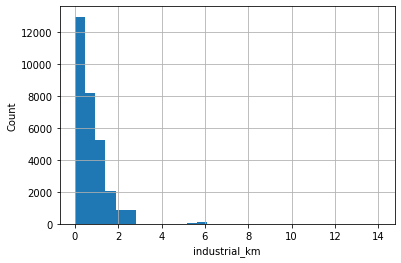

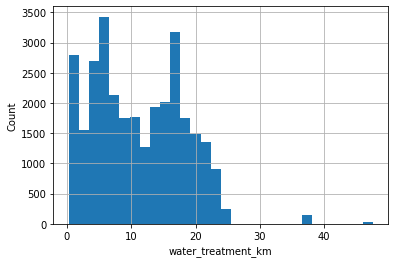

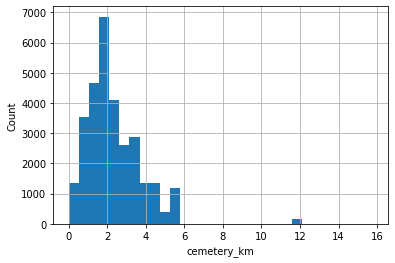

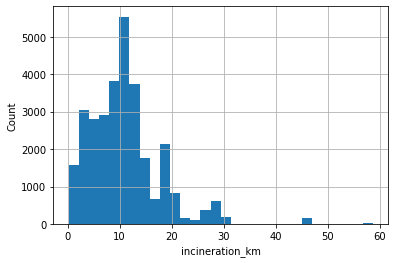

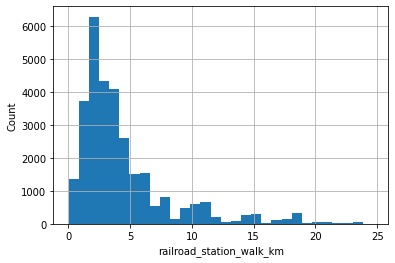

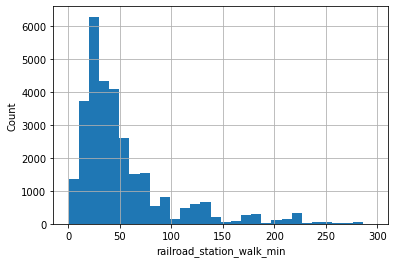

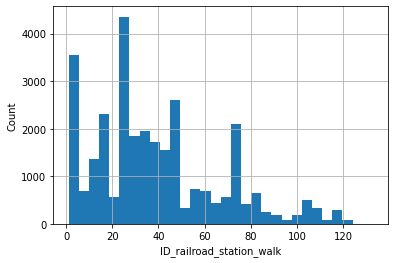

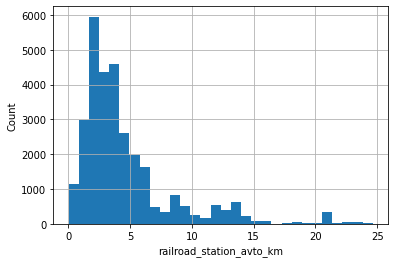

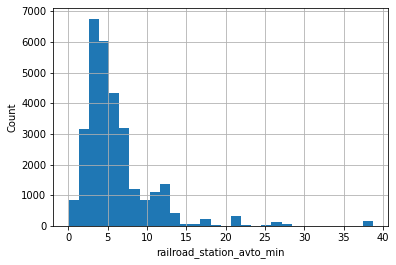

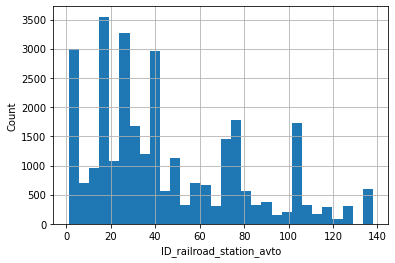

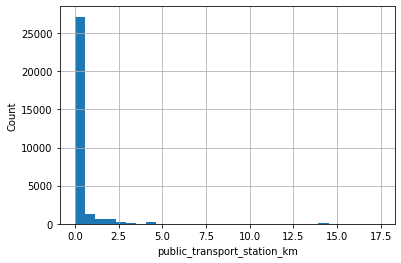

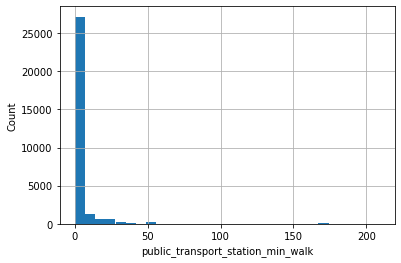

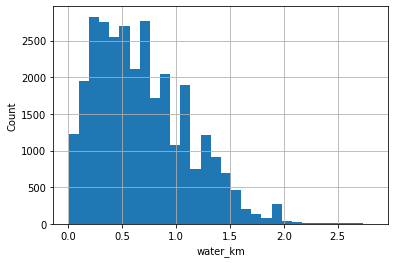

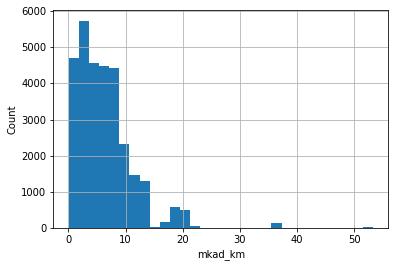

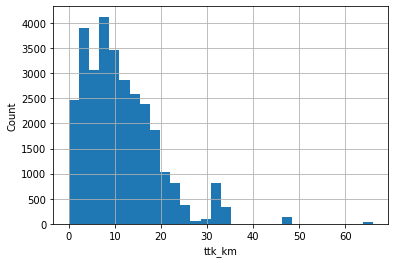

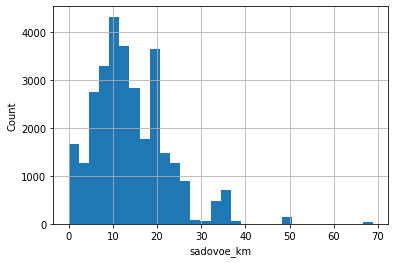

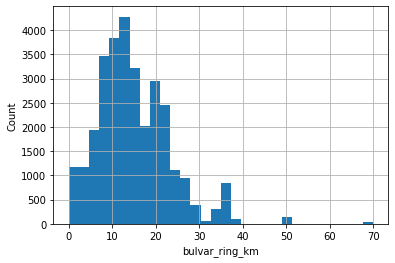

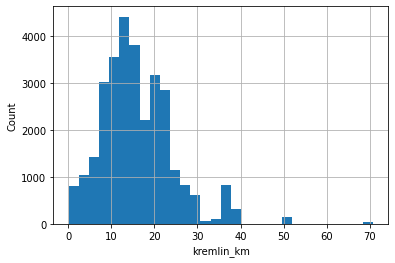

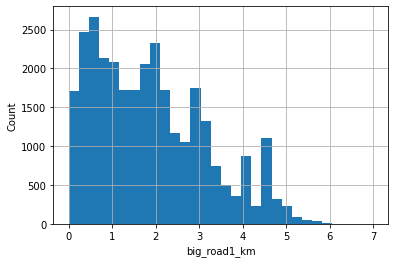

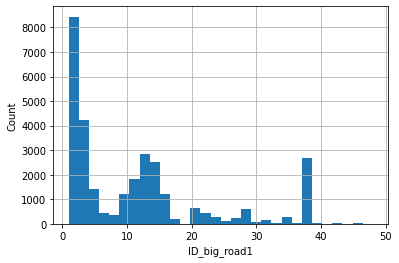

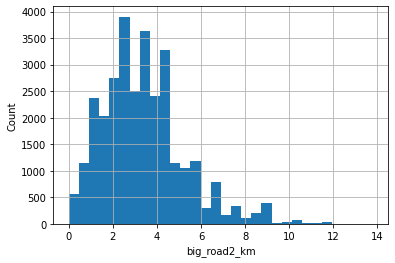

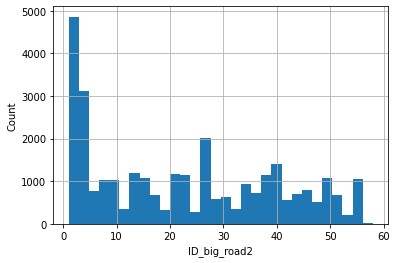

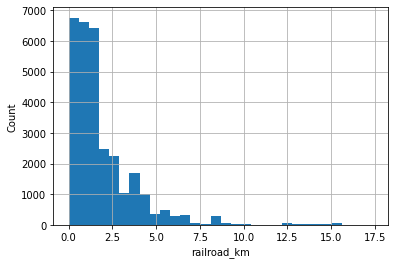

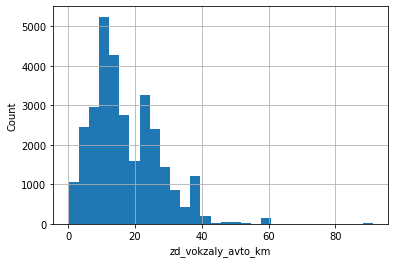

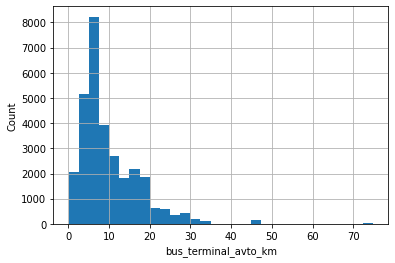

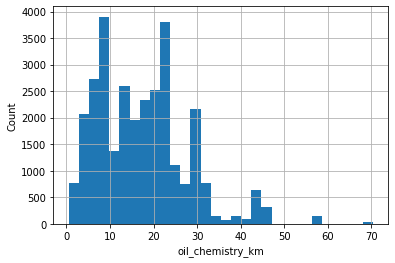

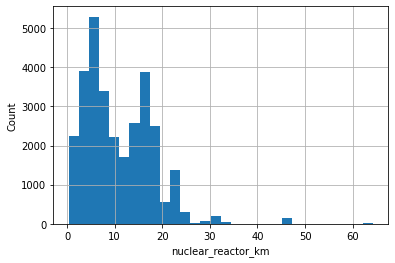

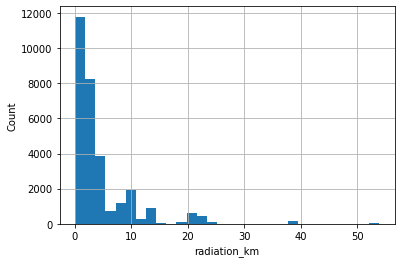

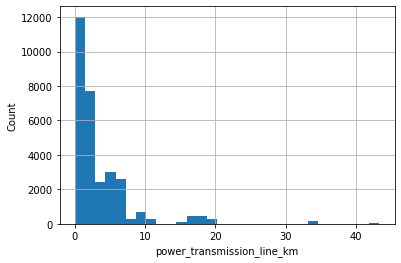

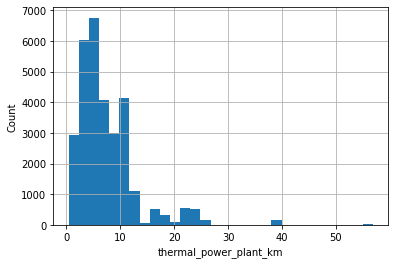

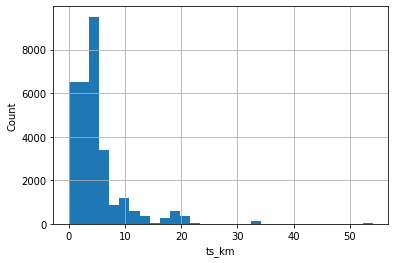

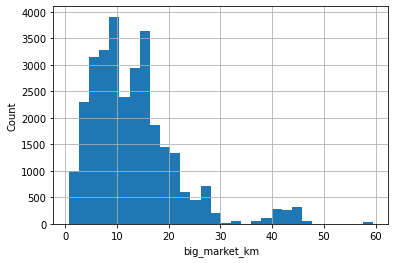

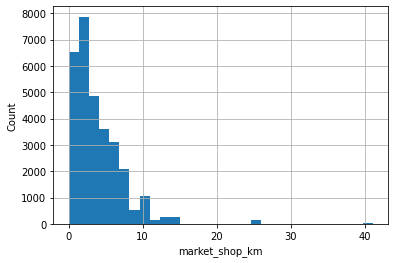

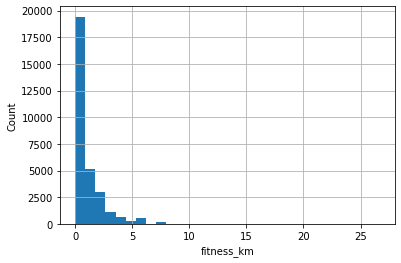

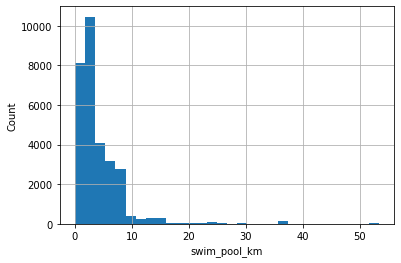

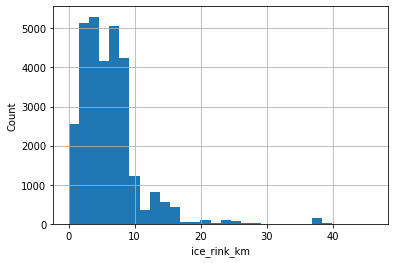

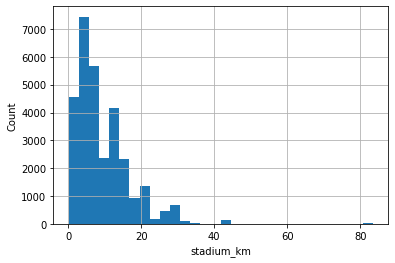

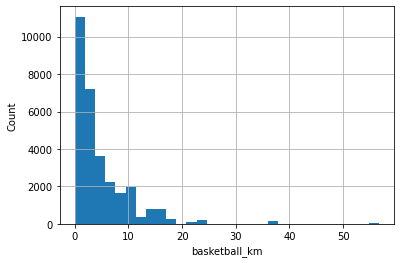

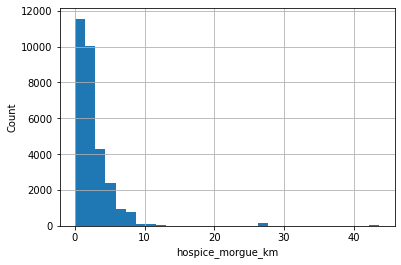

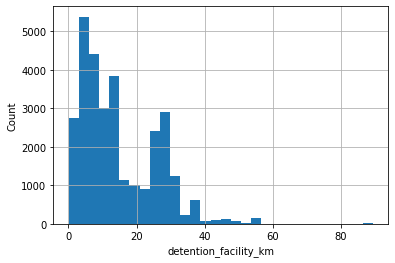

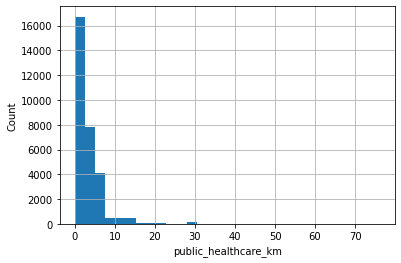

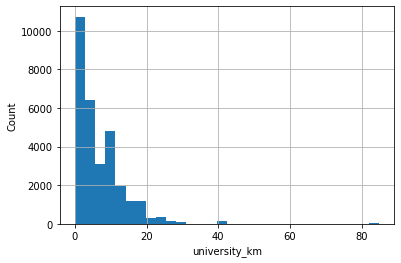

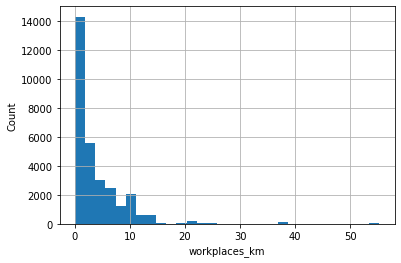

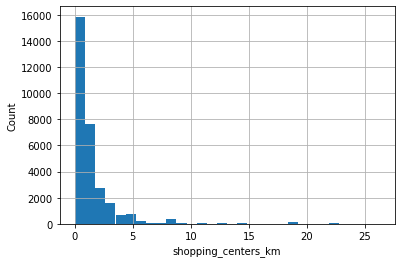

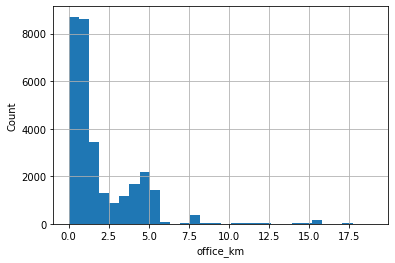

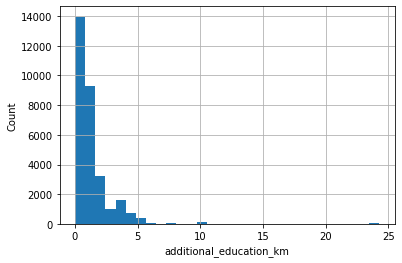

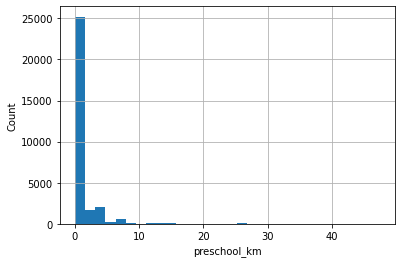

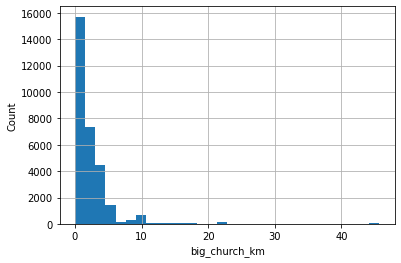

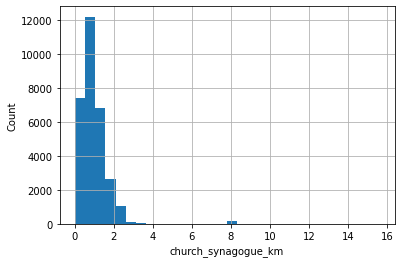

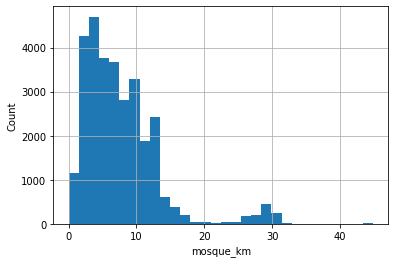

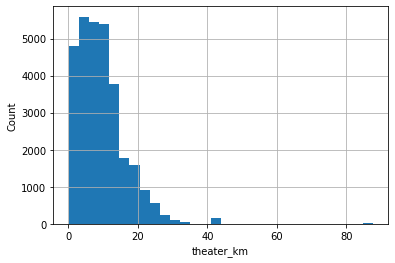

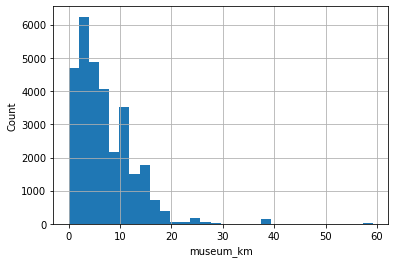

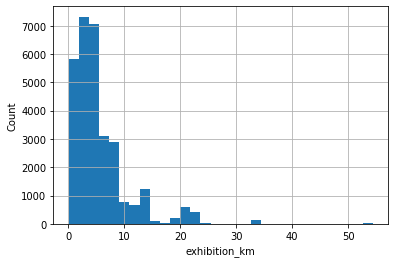

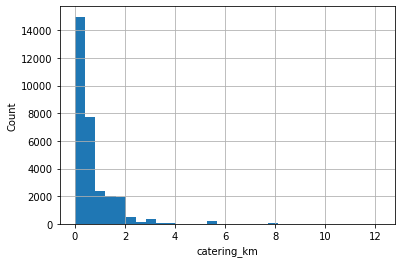

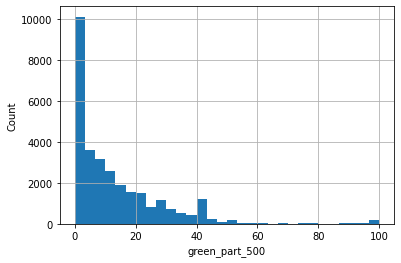

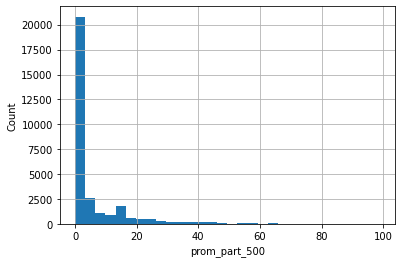

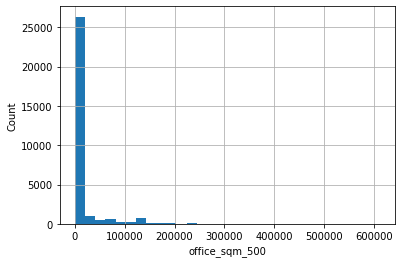

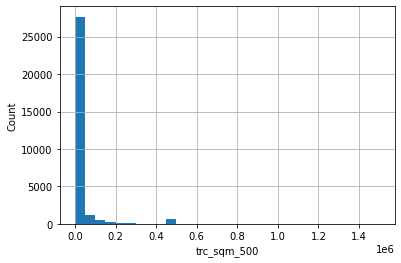

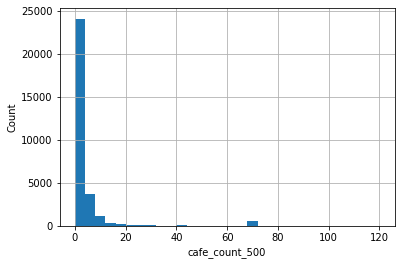

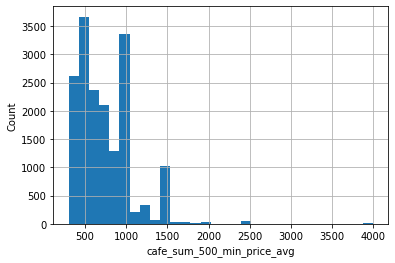

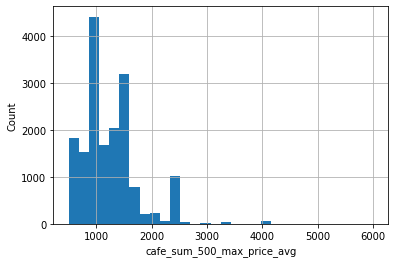

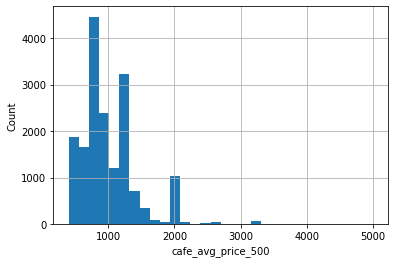

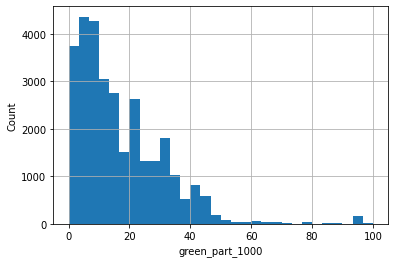

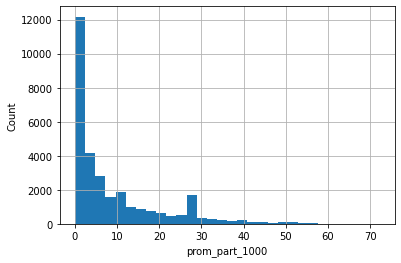

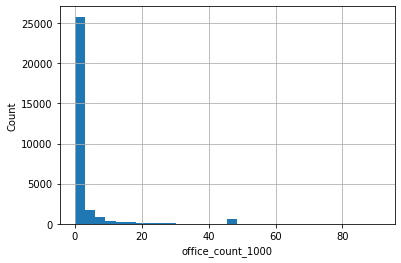

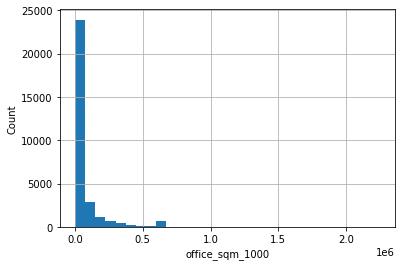

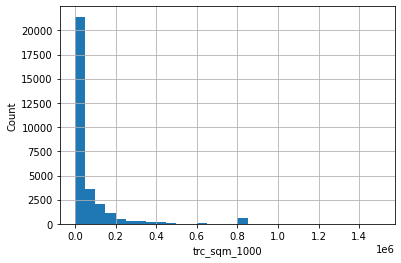

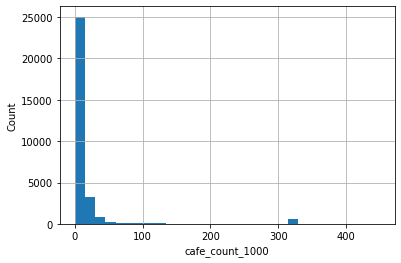

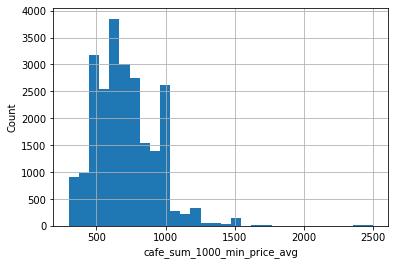

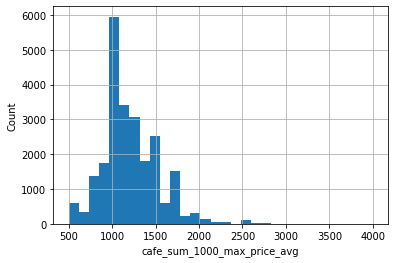

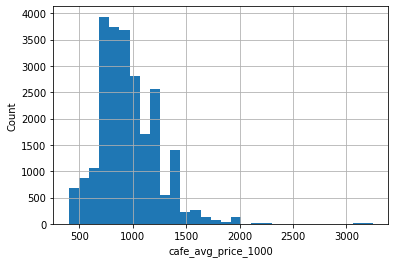

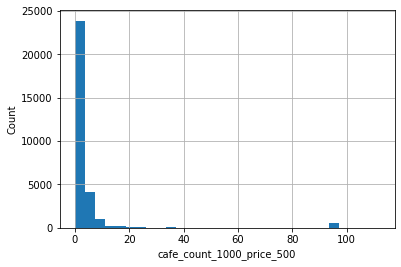

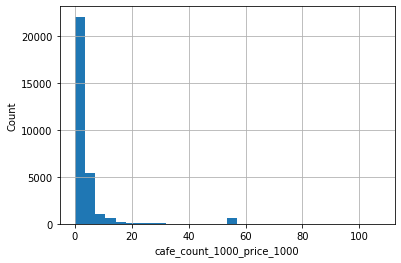

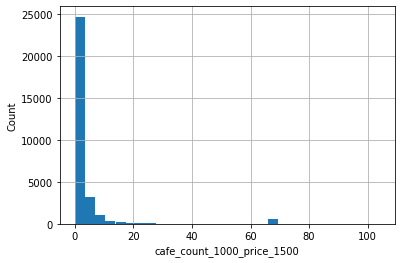

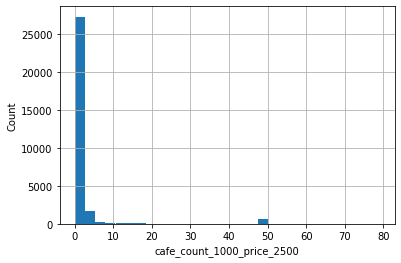

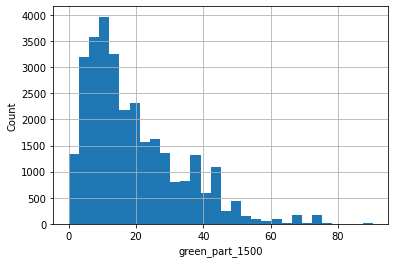

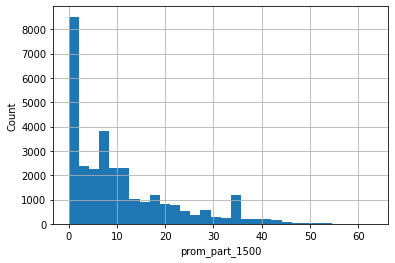

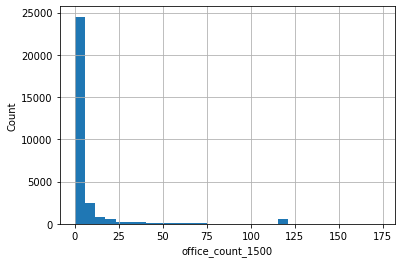

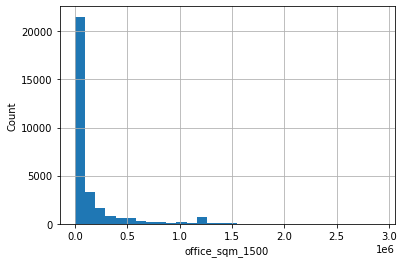

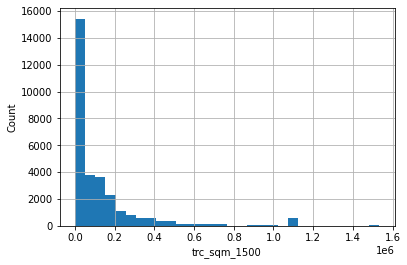

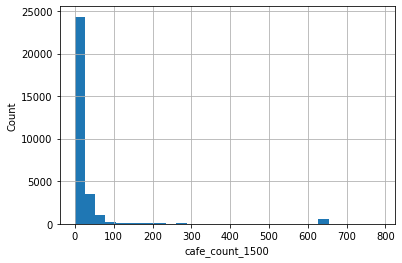

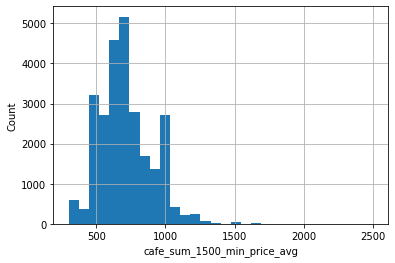

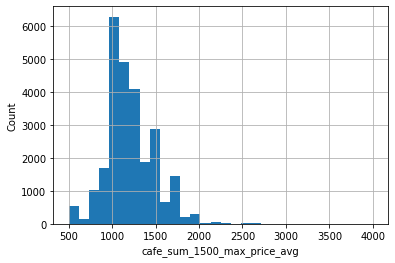

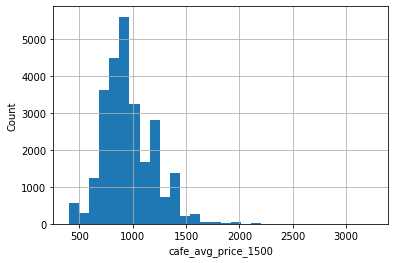

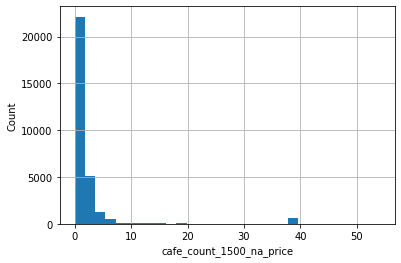

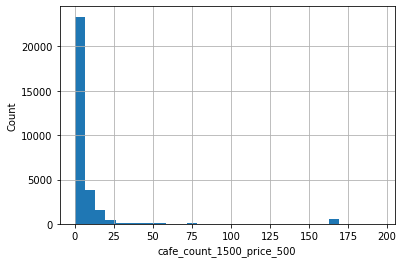

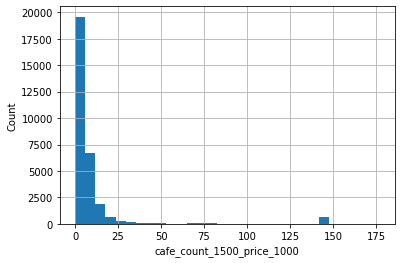

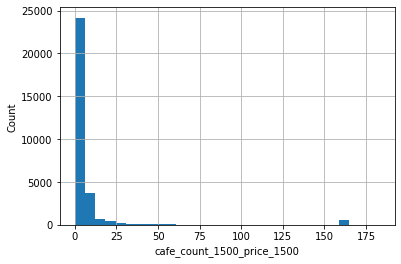

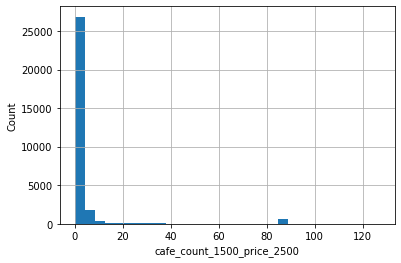

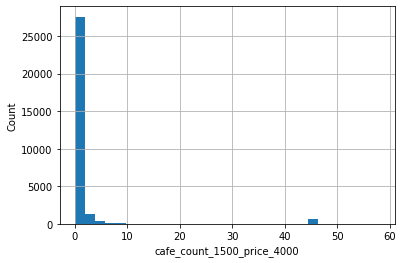

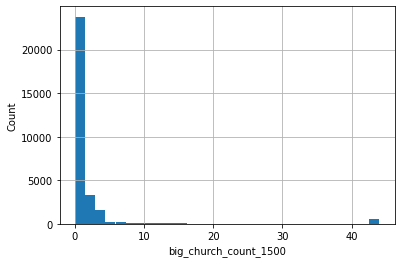

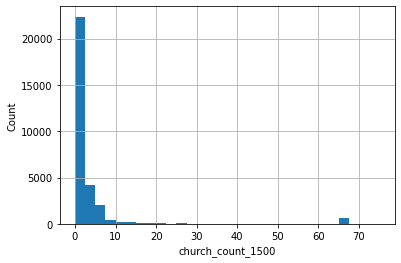

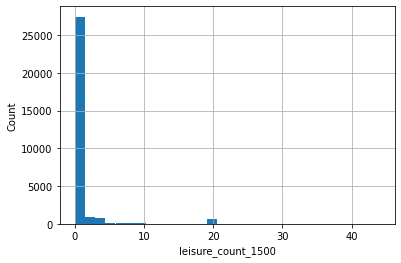

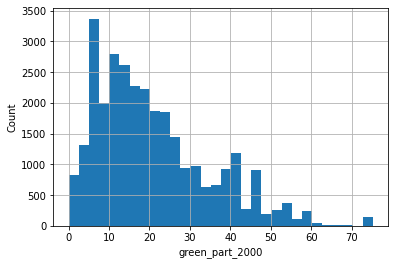

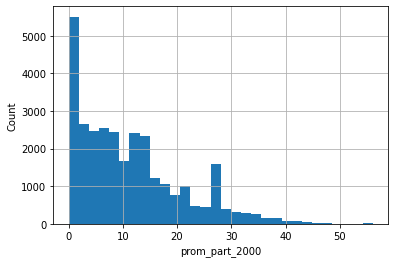

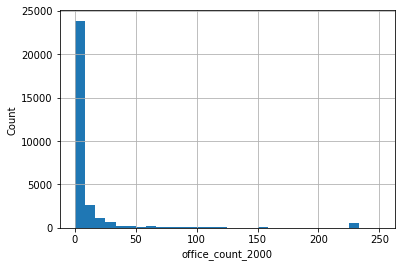

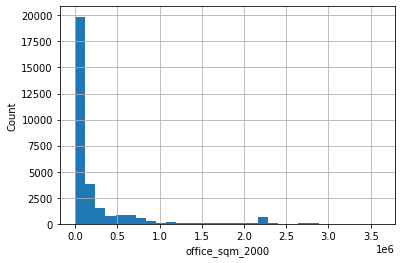

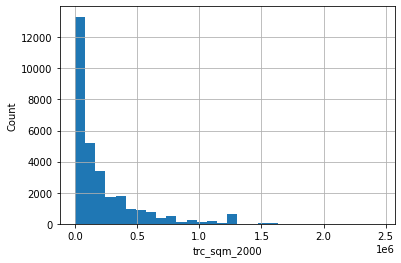

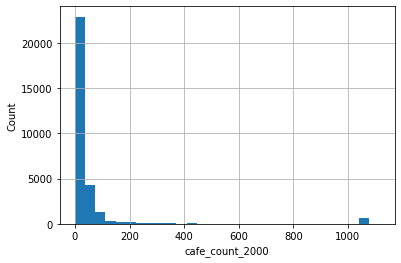

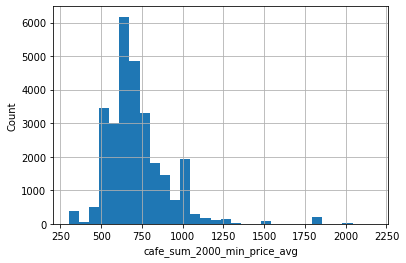

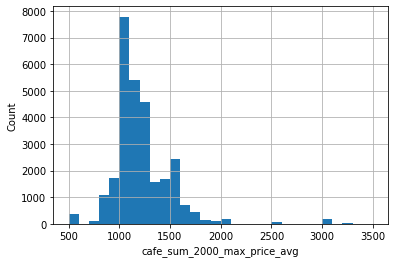

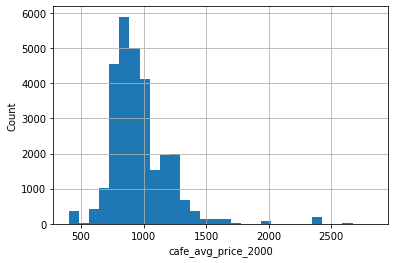

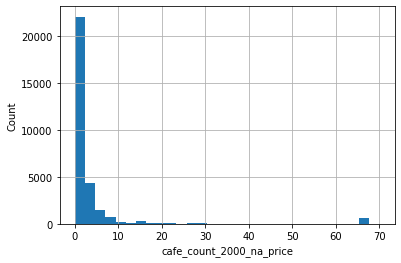

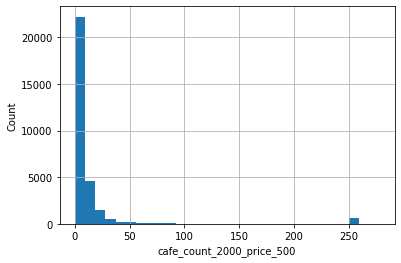

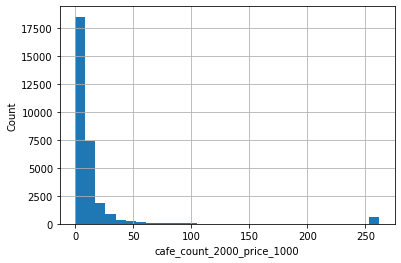

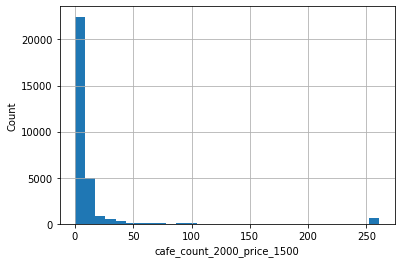

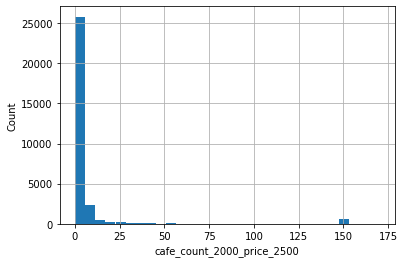

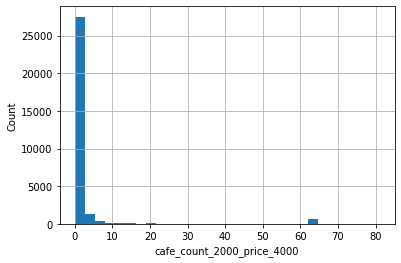

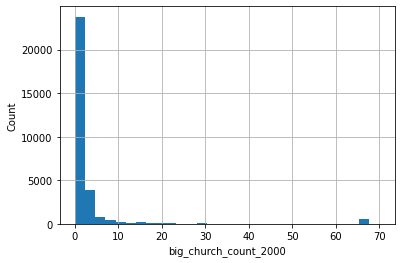

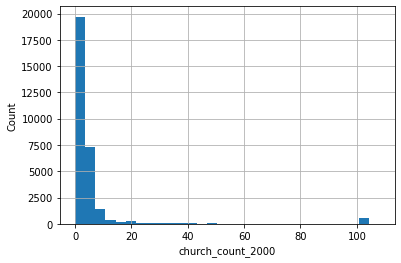

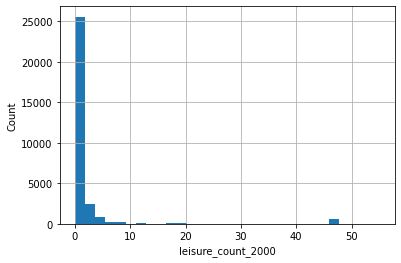

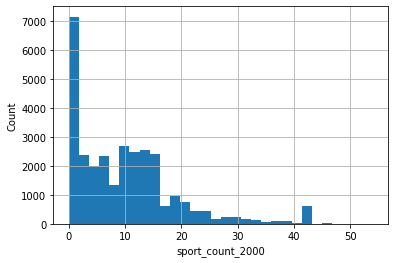

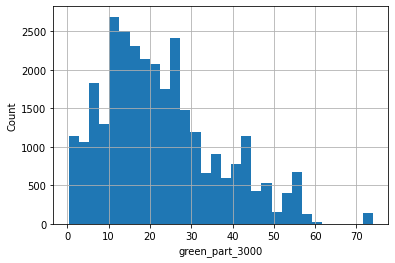

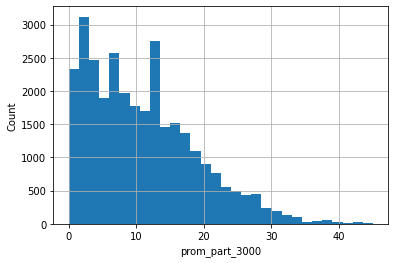

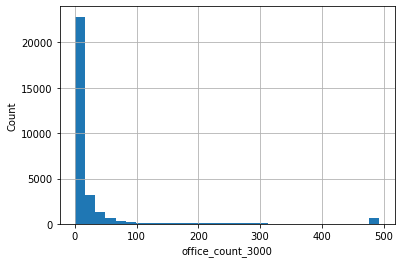

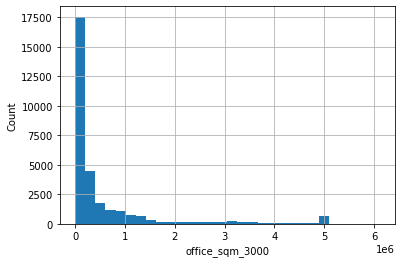

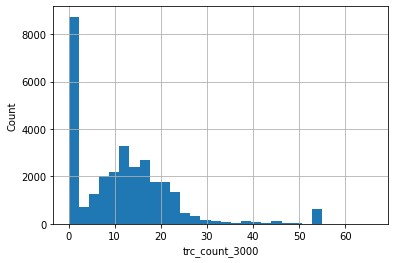

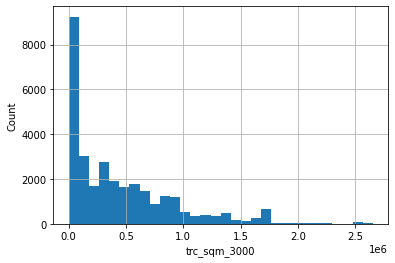

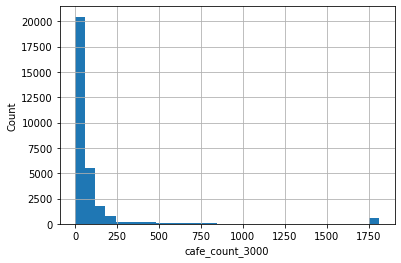

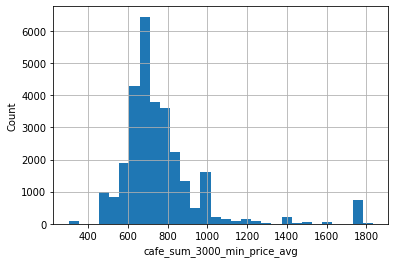

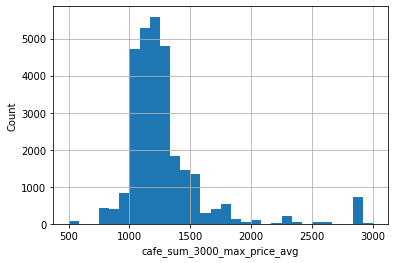

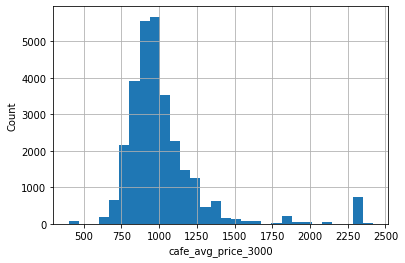

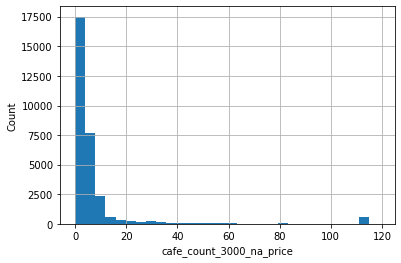

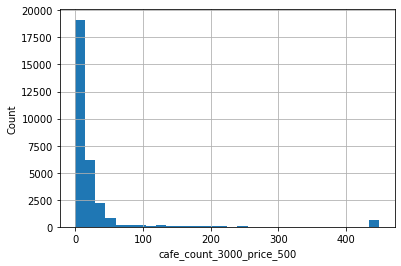

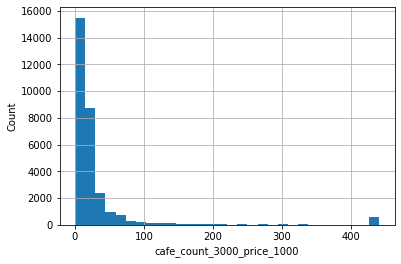

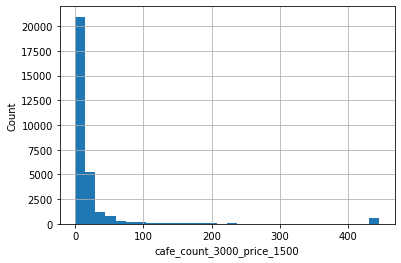

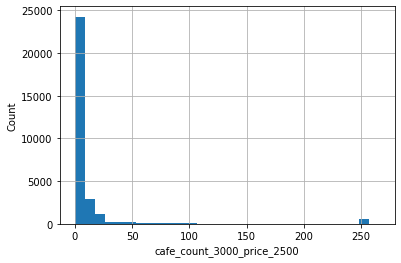

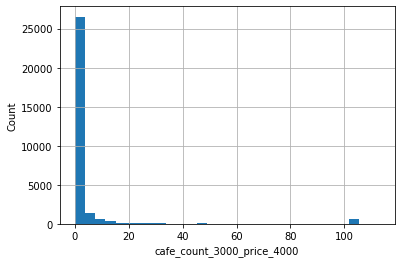

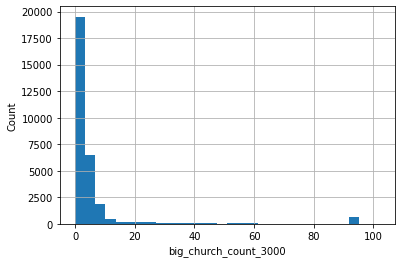

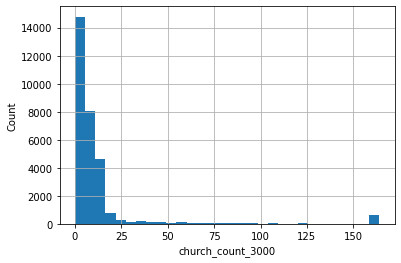

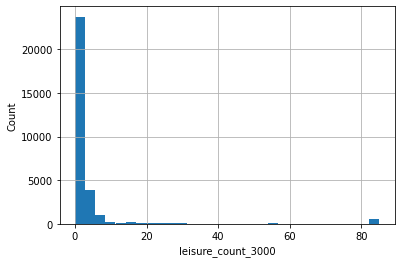

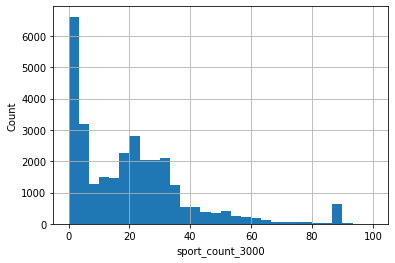

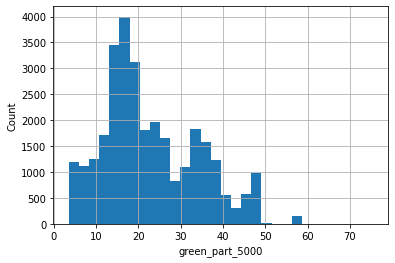

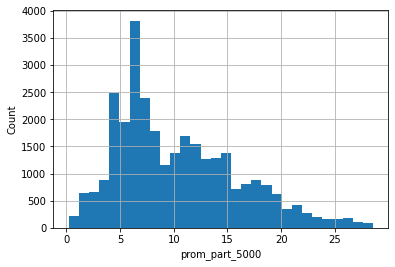

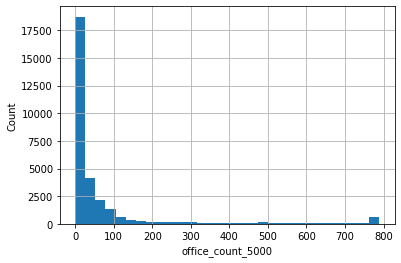

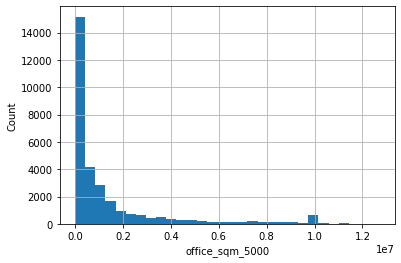

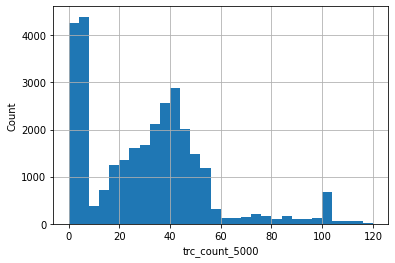

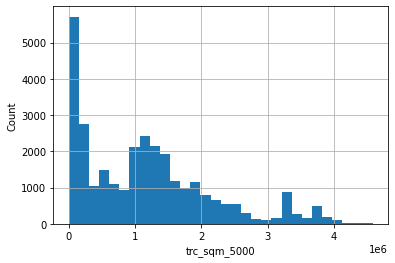

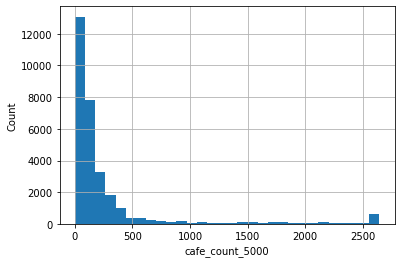

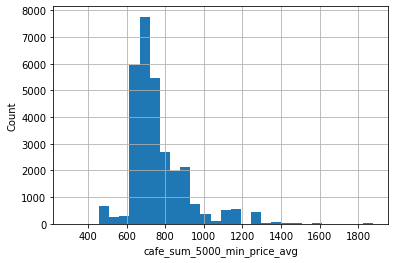

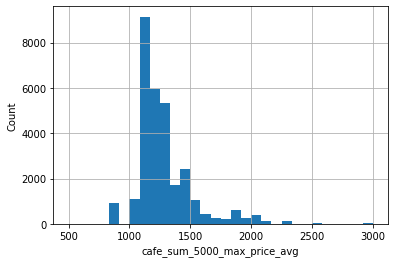

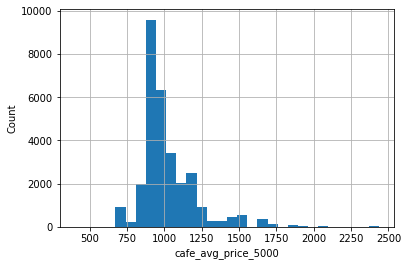

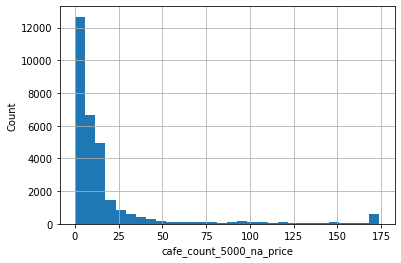

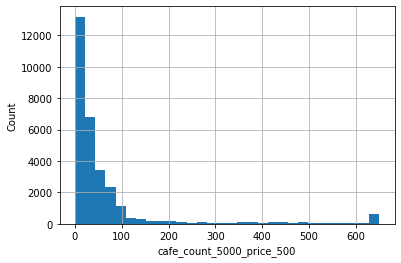

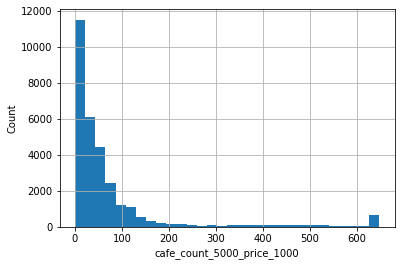

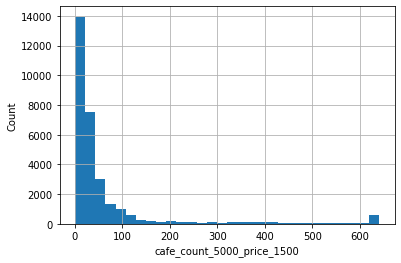

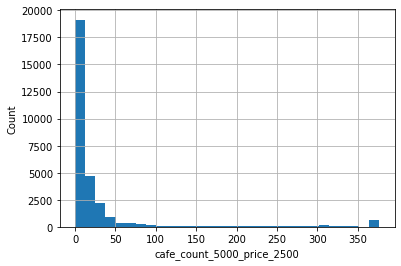

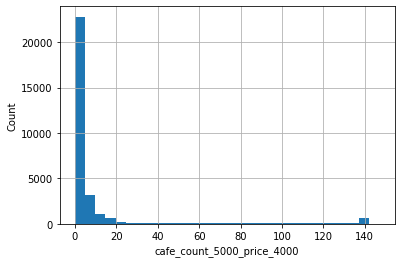

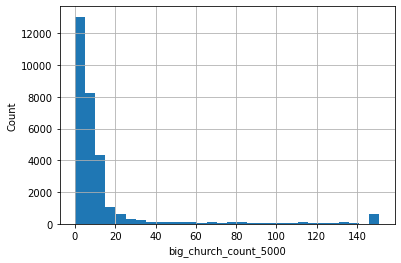

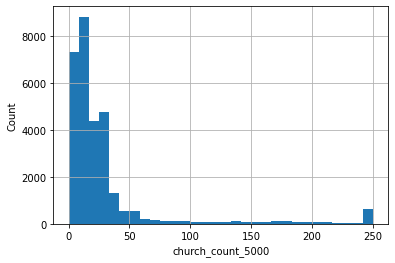

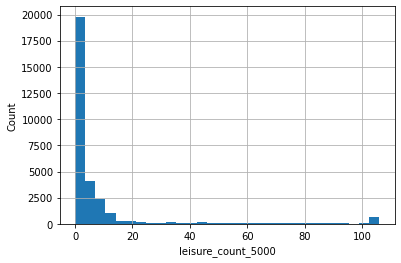

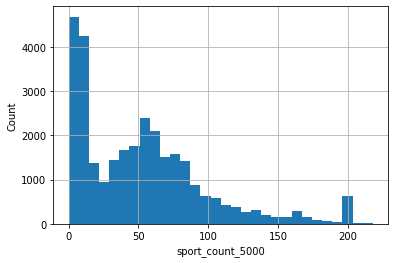

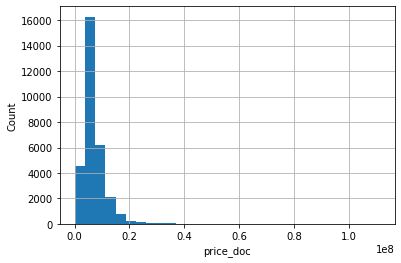

In [19]:
for feature in continuous_feature:
    dataset[feature].hist(bins=30)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [20]:
missing_column = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 0 ]
missing_column

['life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'preschool_quota',
 'school_quota',
 'hospital_beds_raion',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'metro_min_walk',
 'metro_km_walk',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_sum_2000_min_price_avg',
 'cafe_su

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


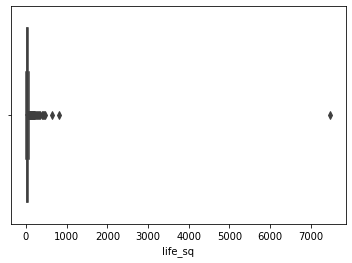

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


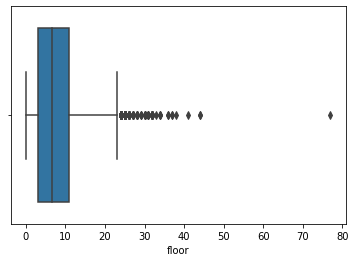

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


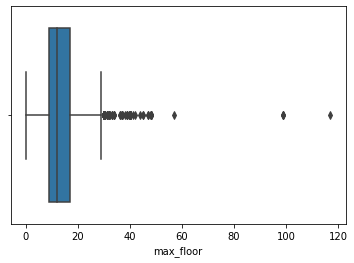

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


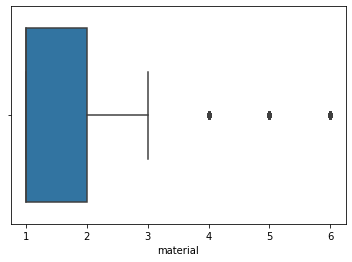

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


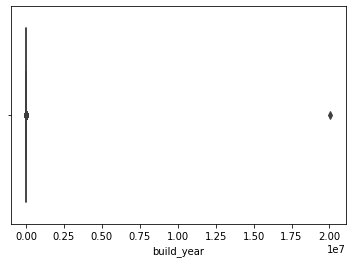

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


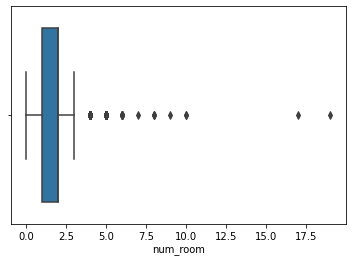

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


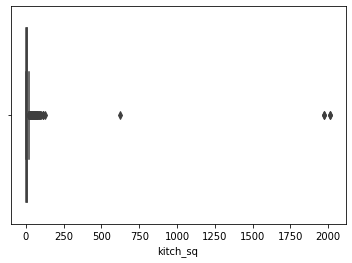

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


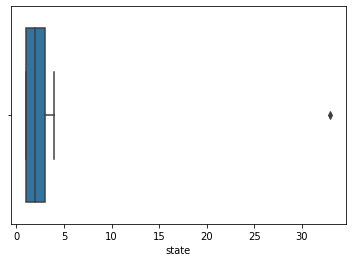

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


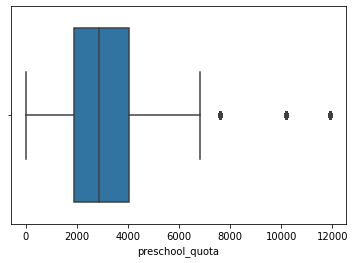

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


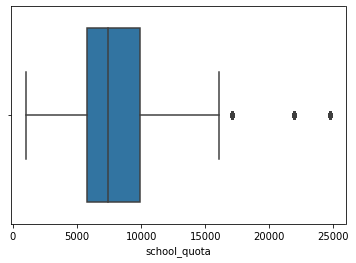

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


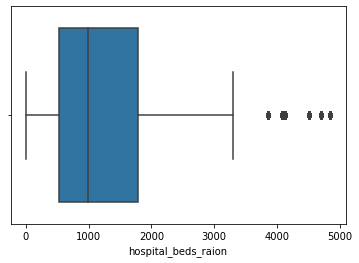

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


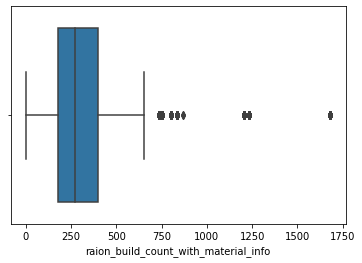

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


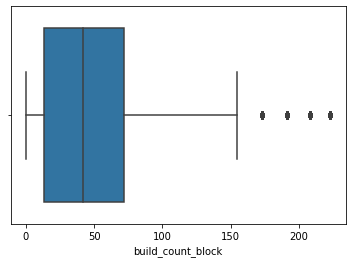

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


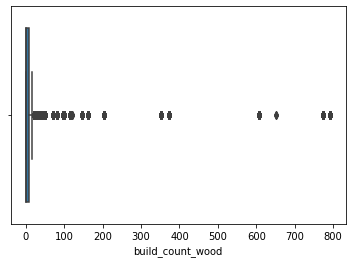

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


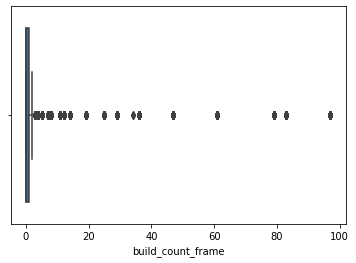

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


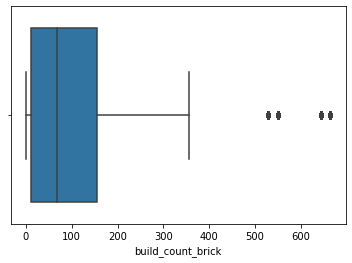

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


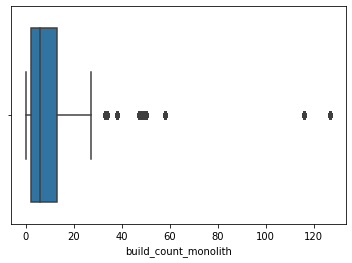

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


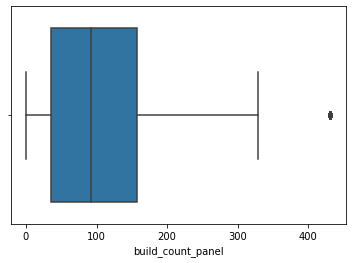

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


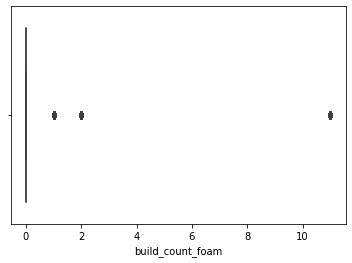

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


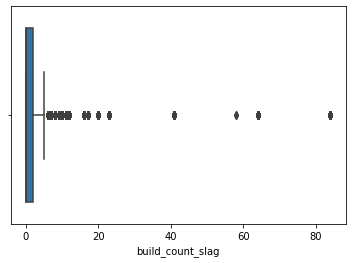

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


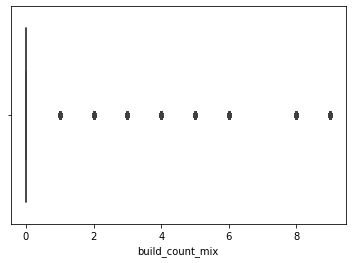

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


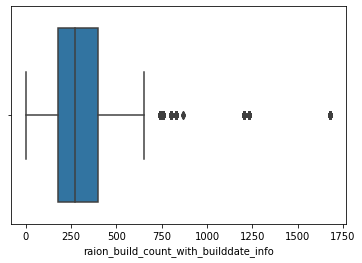

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


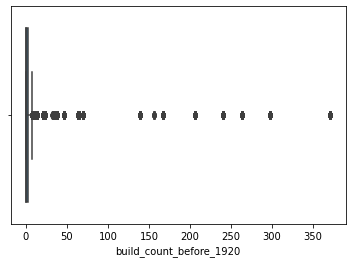

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


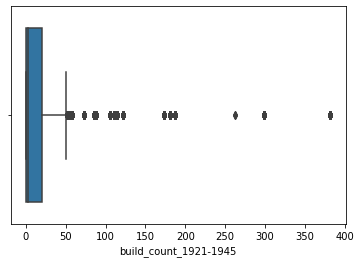

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


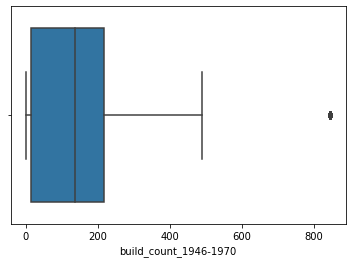

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


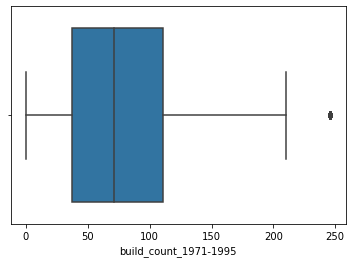

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


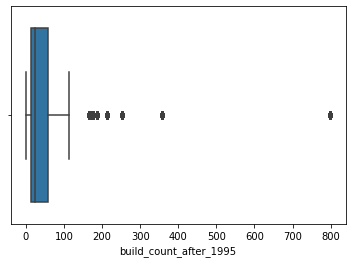

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


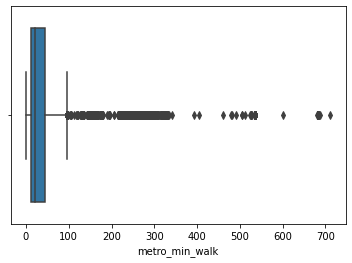

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


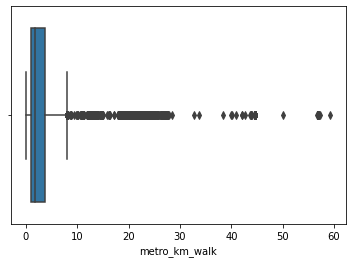

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


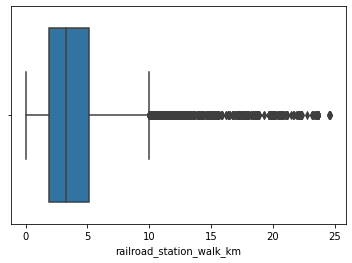

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


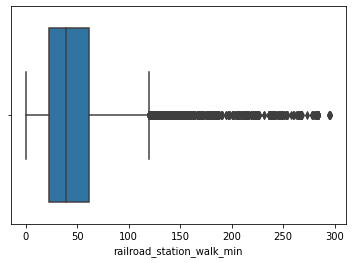

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


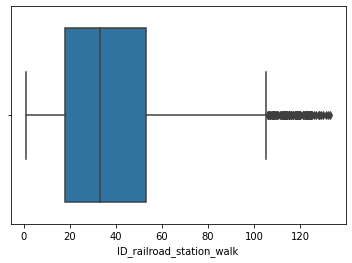

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


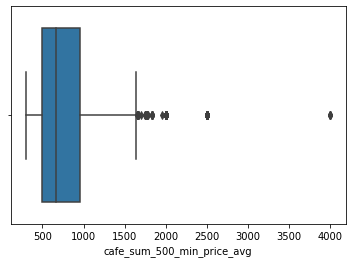

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


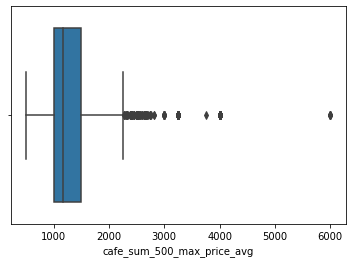

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


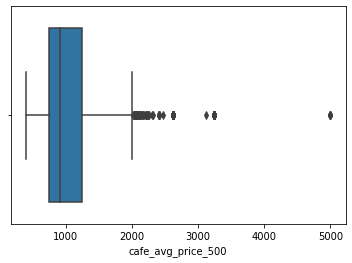

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


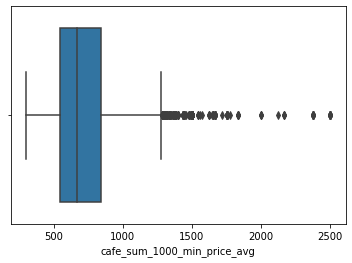

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


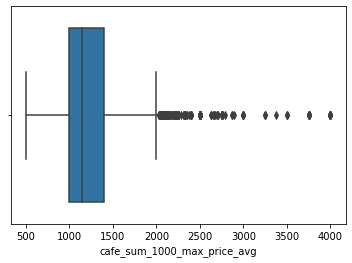

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


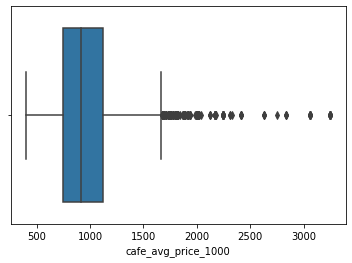

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


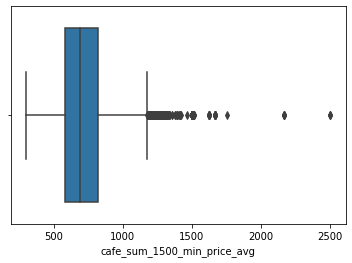

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


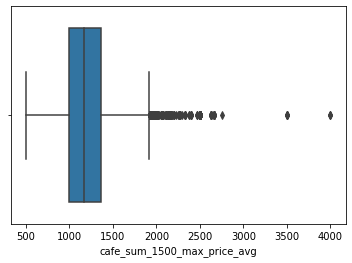

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


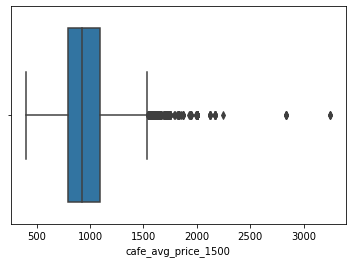

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


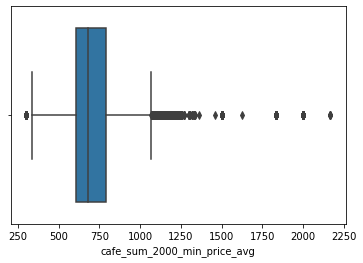

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


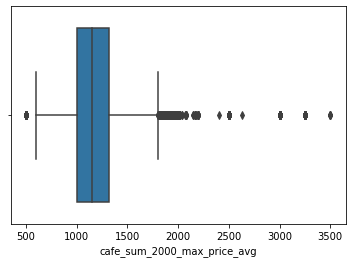

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


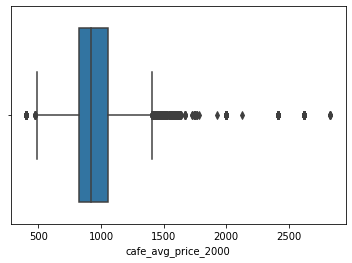

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


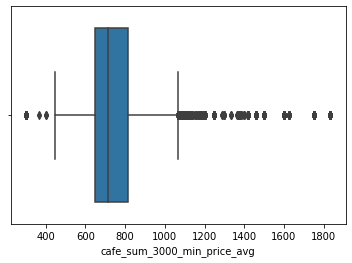

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


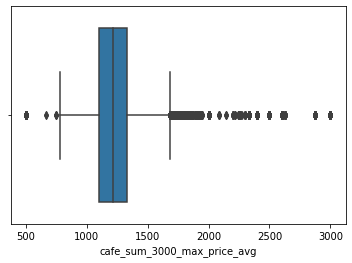

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


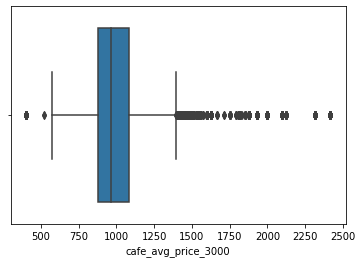

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


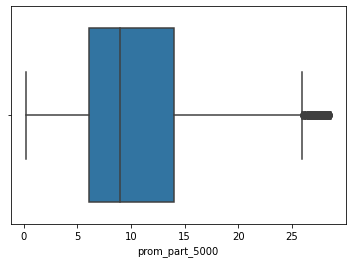

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


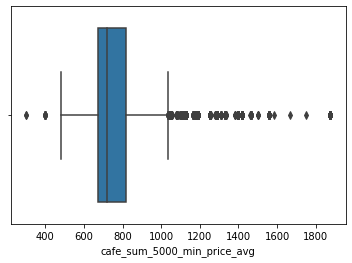

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


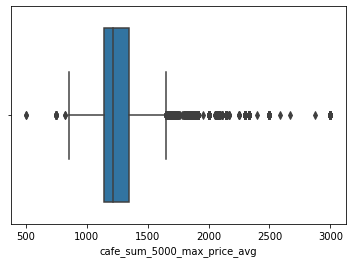

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


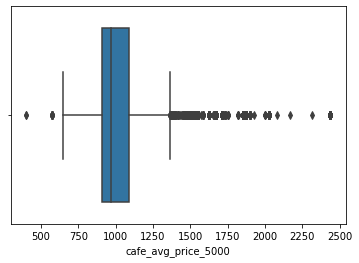

In [21]:
for feature in missing_column:
    sns.boxplot(dataset[feature])
    plt.xlabel(feature)
    plt.show()

In [22]:
dataset['build_year']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
30466    1975.0
30467    1935.0
30468       NaN
30469    2003.0
30470    1968.0
Name: build_year, Length: 30471, dtype: float64

In [23]:
missing_column_numerical = [feature for feature in numerical_feature if dataset[feature].isnull().sum() > 0 ]
missing_column_numerical

['life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'preschool_quota',
 'school_quota',
 'hospital_beds_raion',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'metro_min_walk',
 'metro_km_walk',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_sum_2000_min_price_avg',
 'cafe_su

In [24]:
missing_column_discrete = [feature for feature in numerical_feature if dataset[feature].isnull().sum() > 0 ]
missing_column_discrete

['life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'preschool_quota',
 'school_quota',
 'hospital_beds_raion',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'metro_min_walk',
 'metro_km_walk',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_sum_2000_min_price_avg',
 'cafe_su

# Feature Engineering

In [25]:
for feature in missing_column_numerical:
    value = dataset[feature].median()
    dataset[feature].fillna(value,inplace=True)

In [26]:
for feature in missing_column_discrete:
    value = dataset[feature].mode()
    dataset[feature].fillna(value,inplace=True)

In [27]:
dataset.isnull().sum()

full_sq                                  0
life_sq                                  0
floor                                    0
max_floor                                0
material                                 0
build_year                               0
num_room                                 0
kitch_sq                                 0
state                                    0
product_type                             0
area_m                                   0
raion_popul                              0
green_zone_part                          0
indust_part                              0
children_preschool                       0
preschool_quota                          0
preschool_education_centers_raion        0
children_school                          0
school_quota                             0
school_education_centers_raion           0
school_education_centers_top_20_raion    0
hospital_beds_raion                      0
healthcare_centers_raion                 0
university_

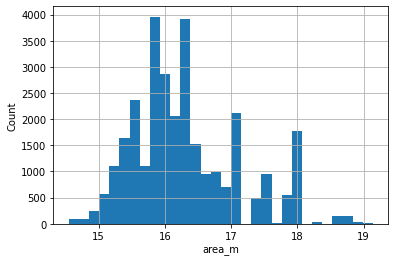

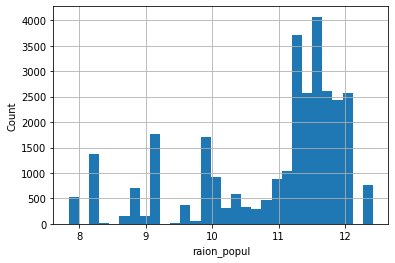

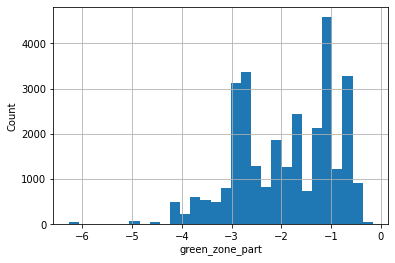

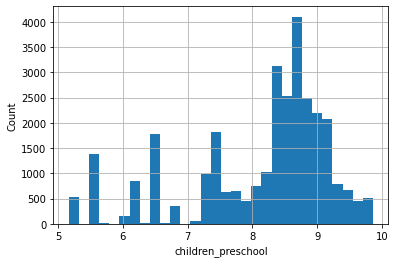

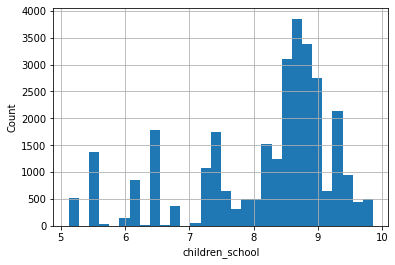

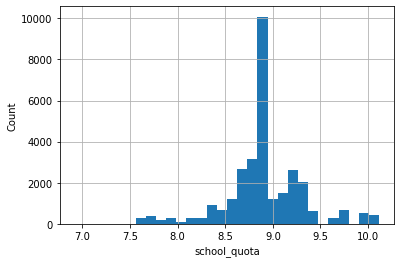

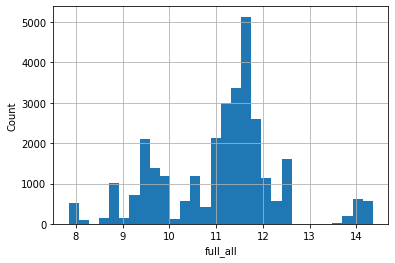

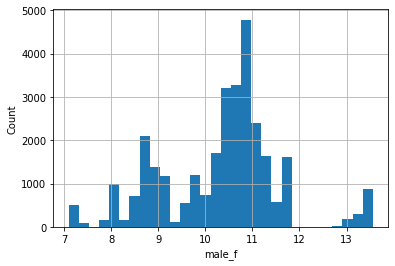

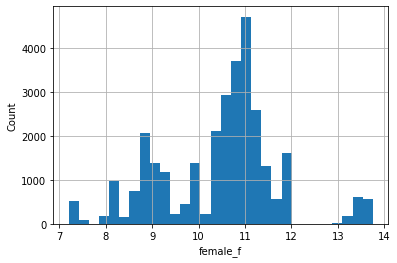

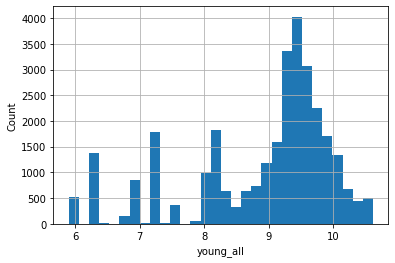

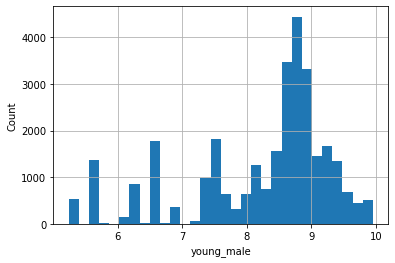

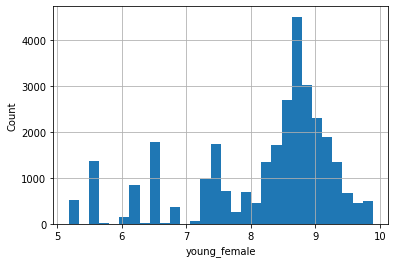

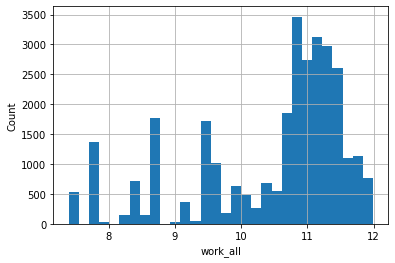

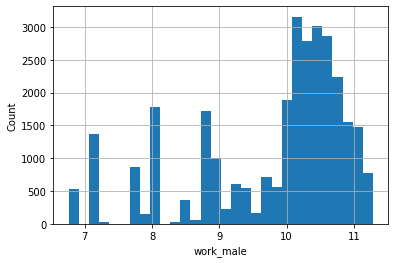

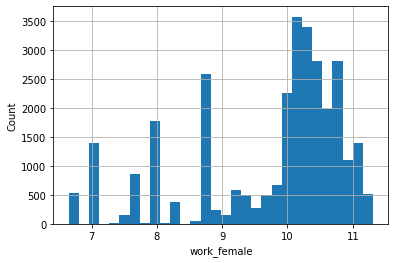

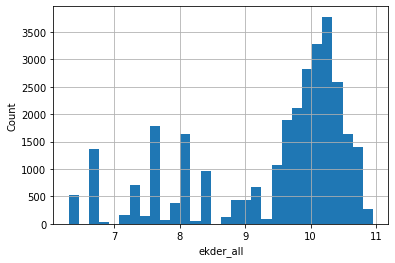

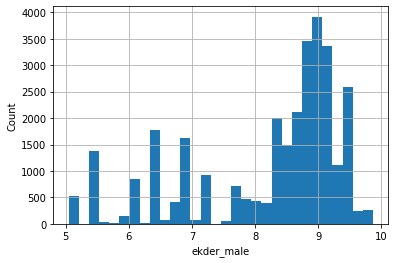

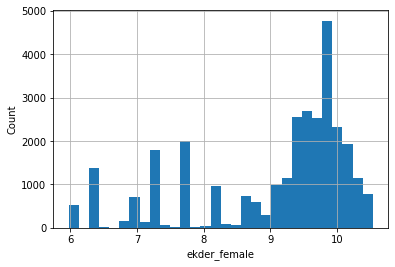

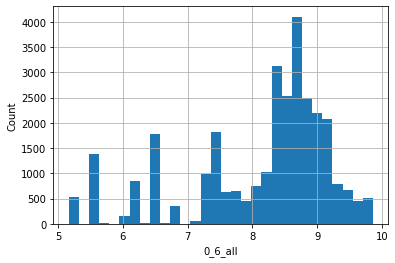

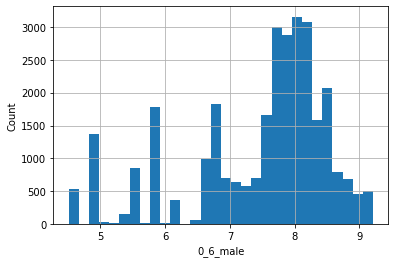

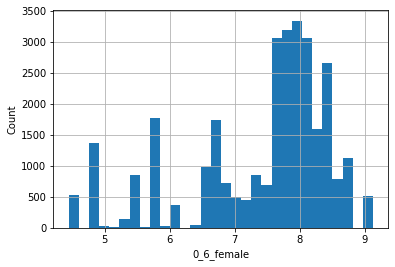

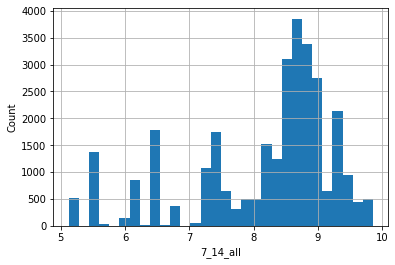

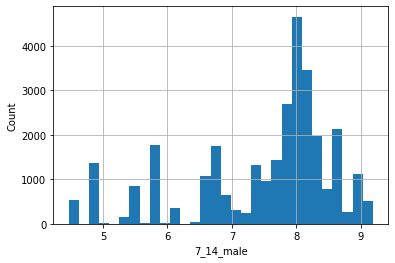

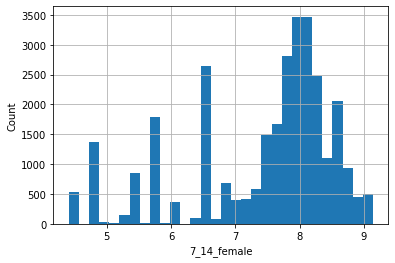

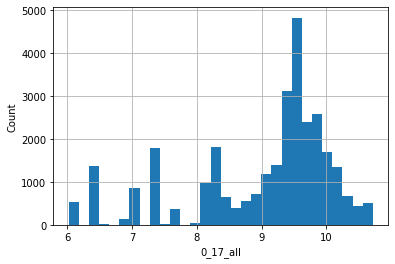

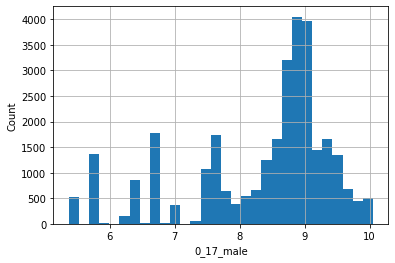

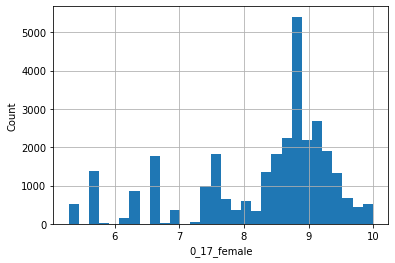

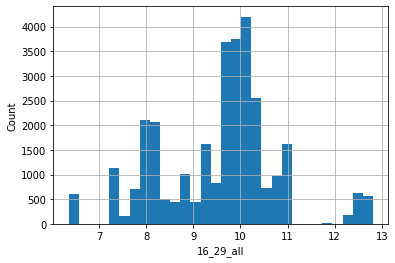

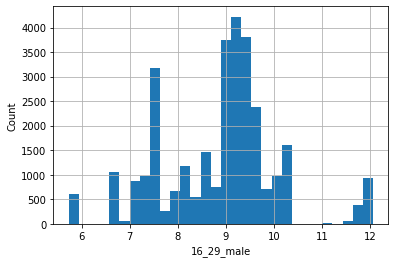

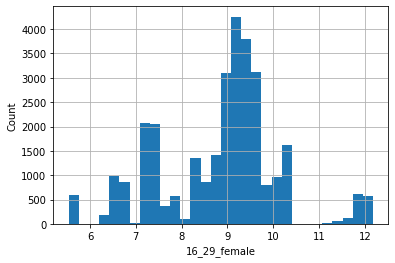

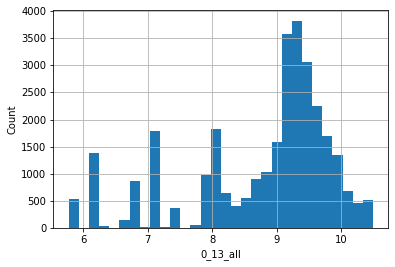

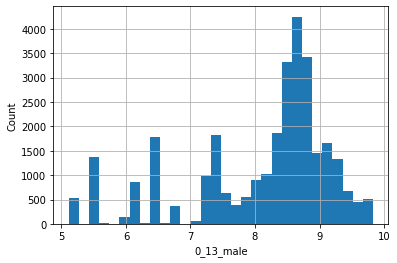

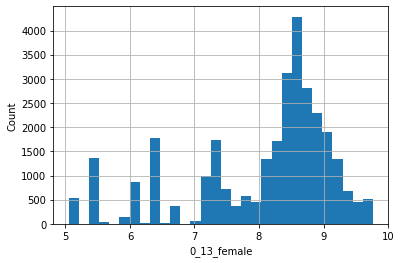

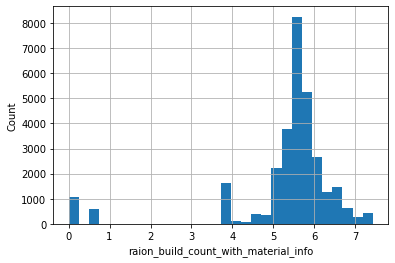

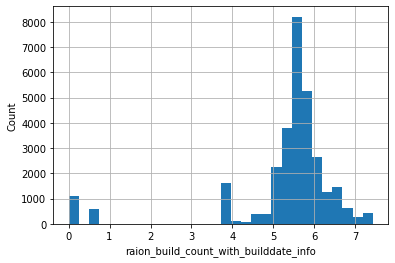

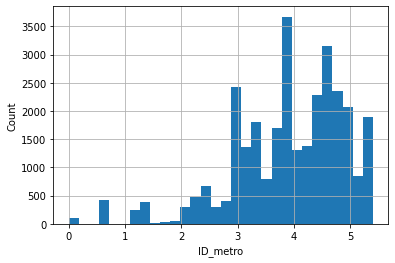

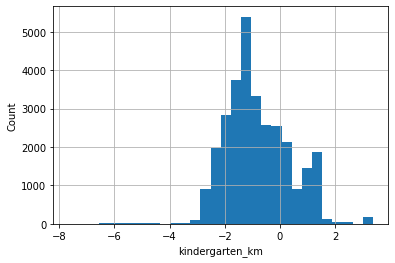

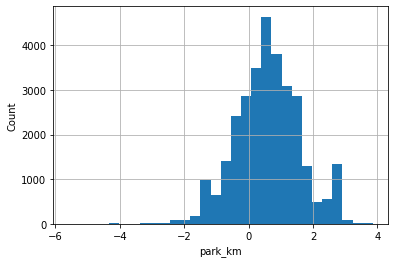

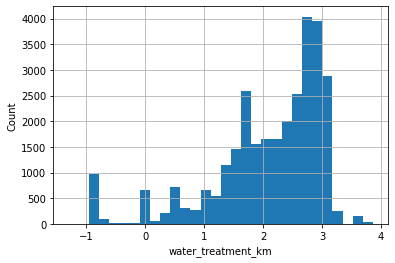

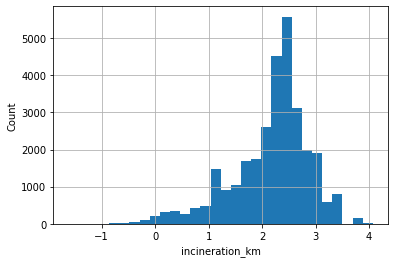

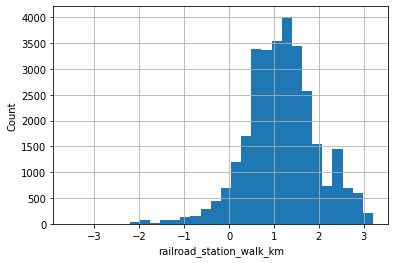

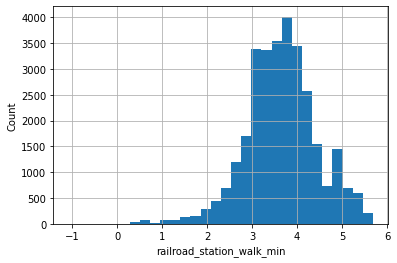

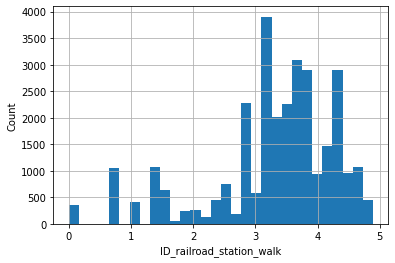

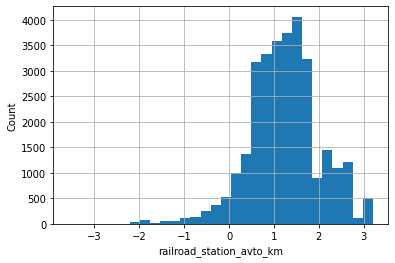

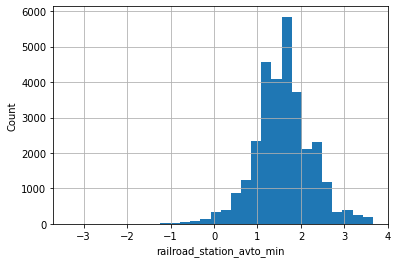

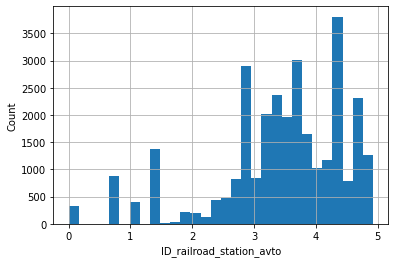

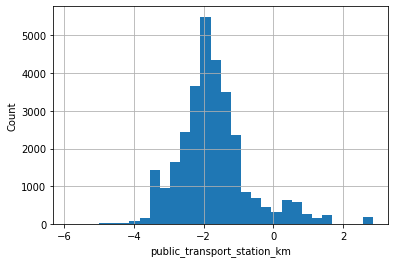

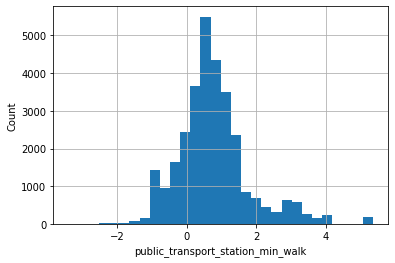

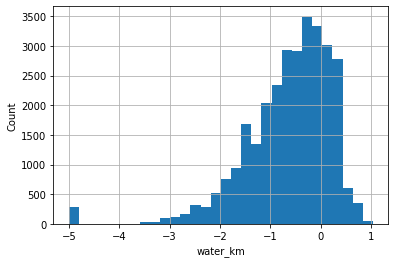

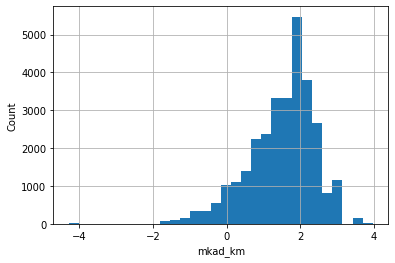

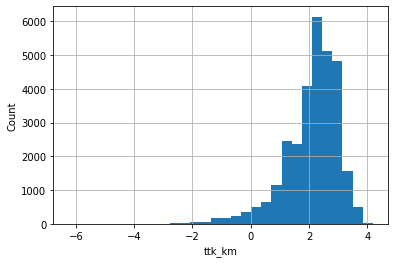

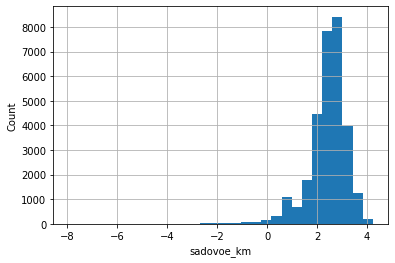

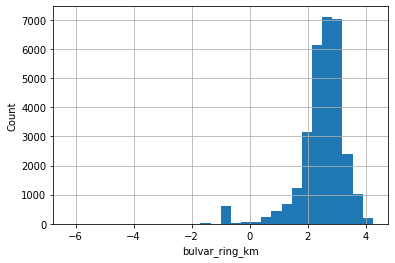

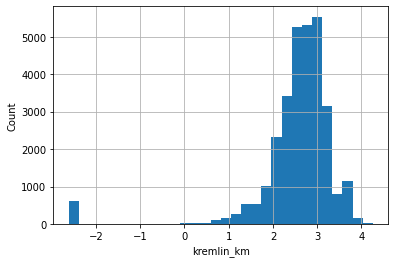

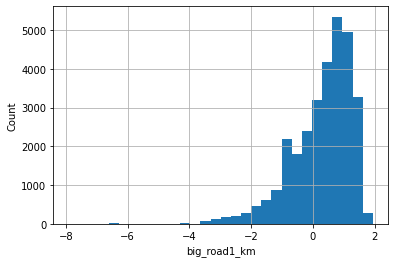

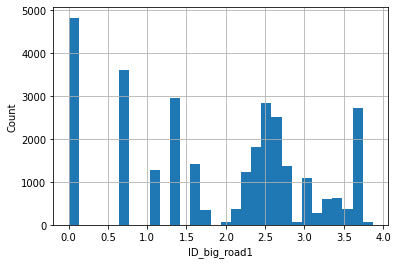

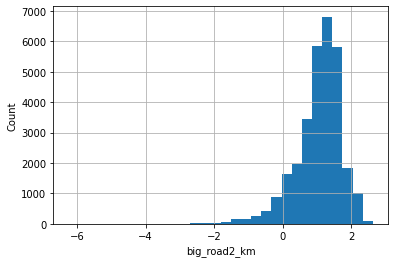

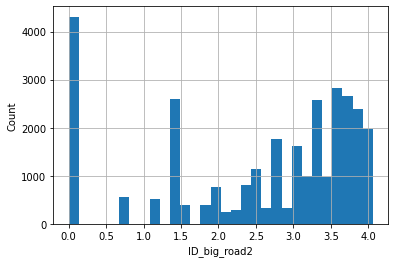

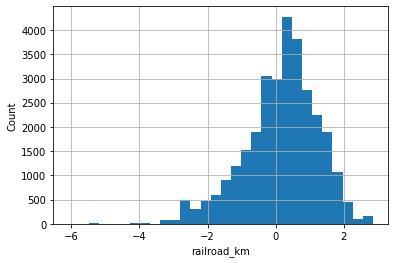

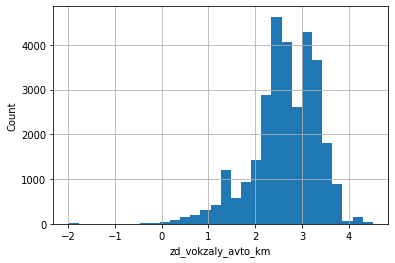

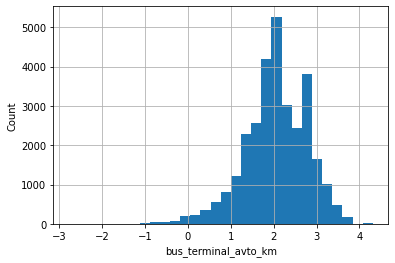

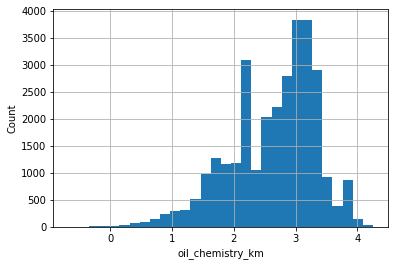

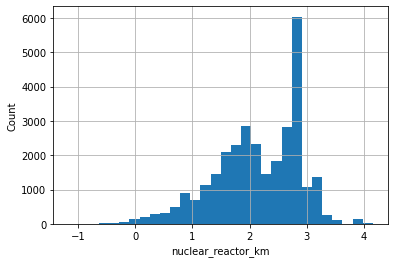

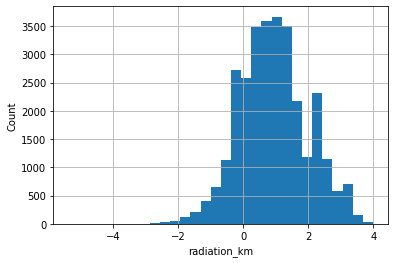

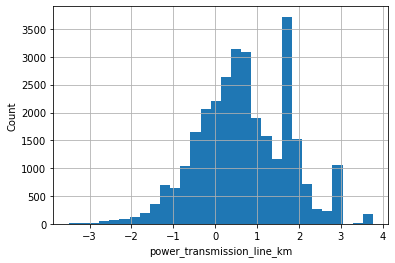

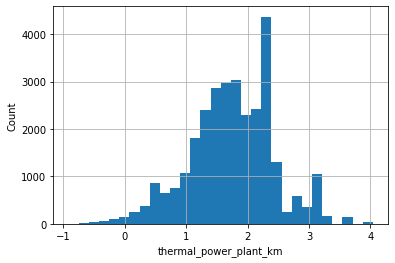

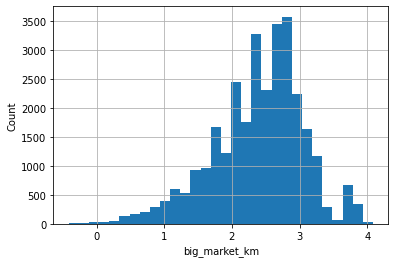

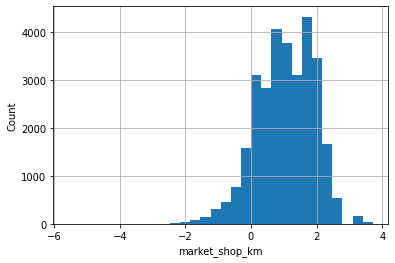

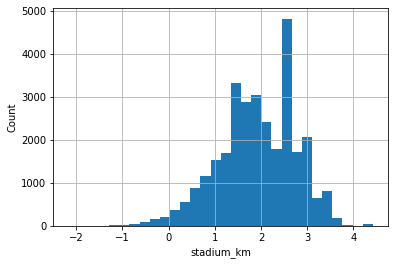

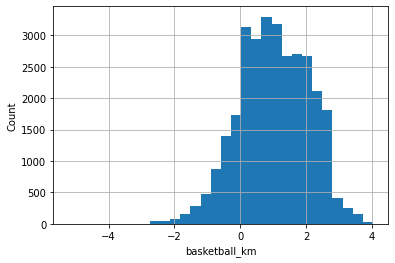

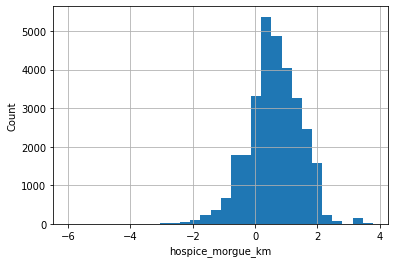

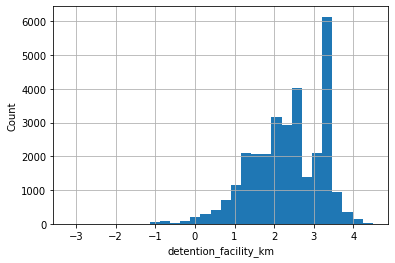

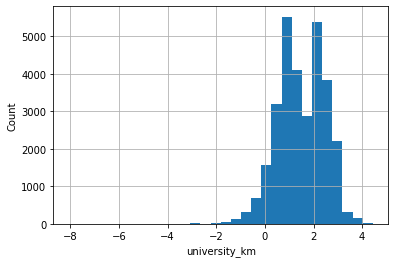

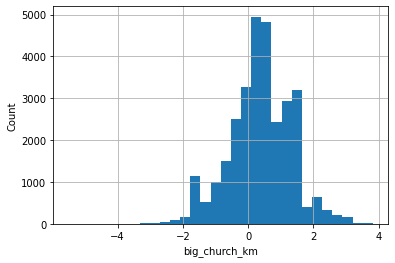

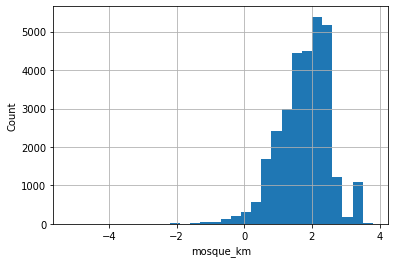

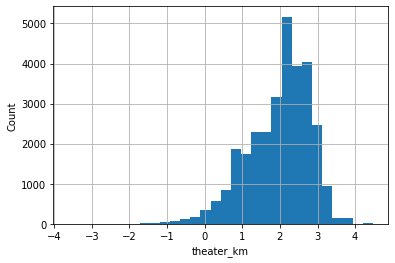

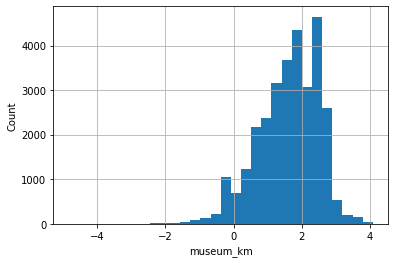

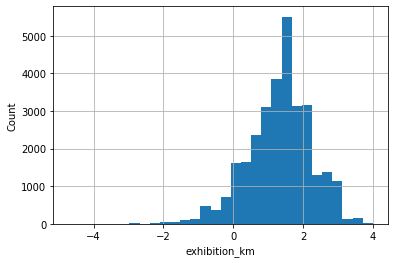

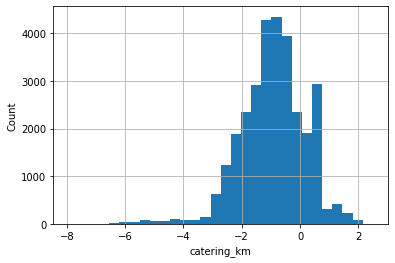

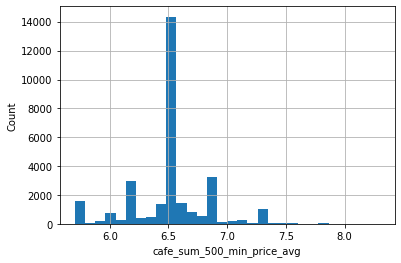

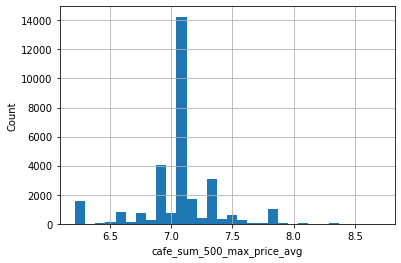

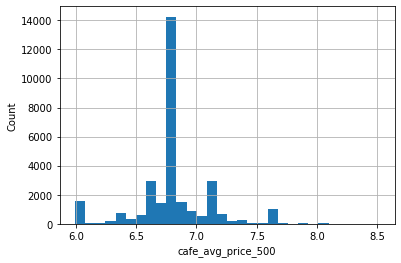

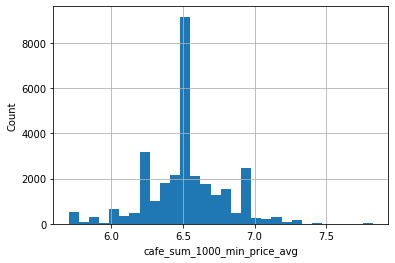

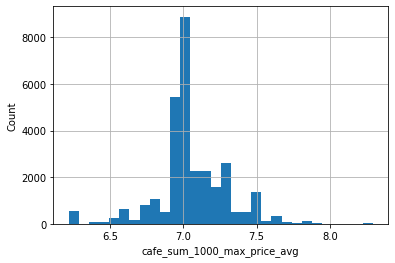

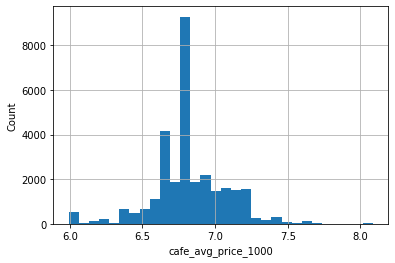

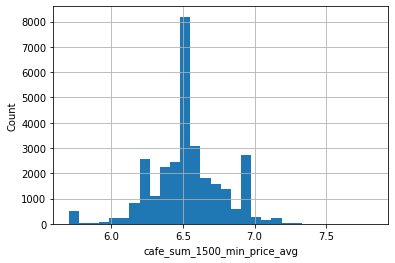

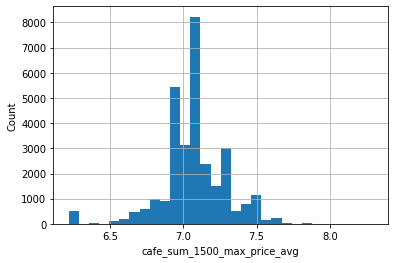

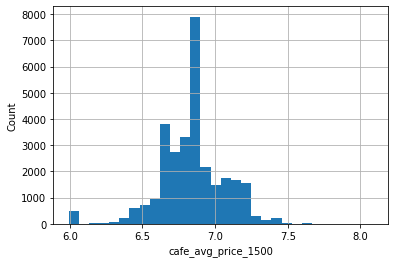

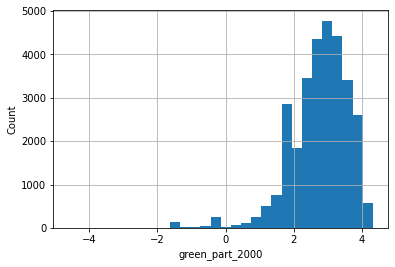

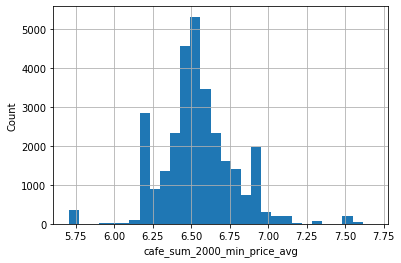

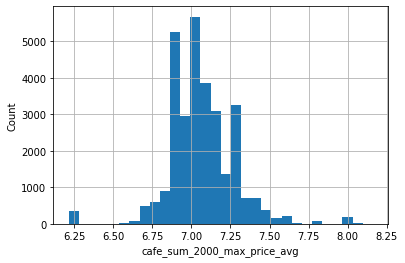

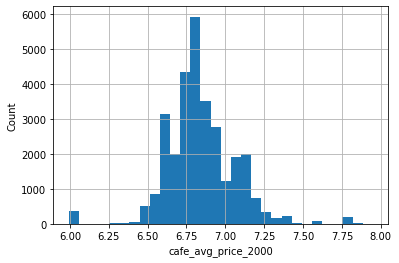

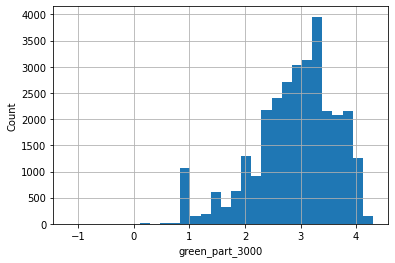

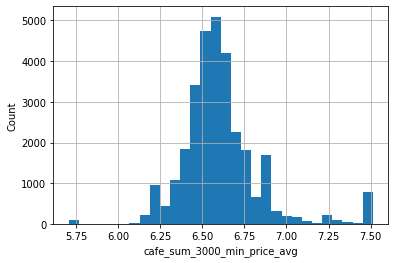

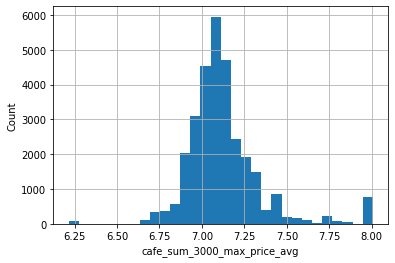

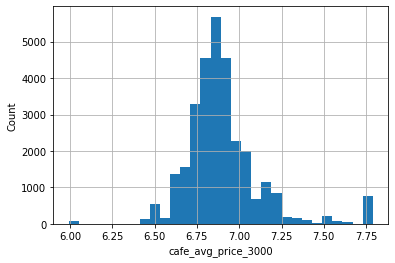

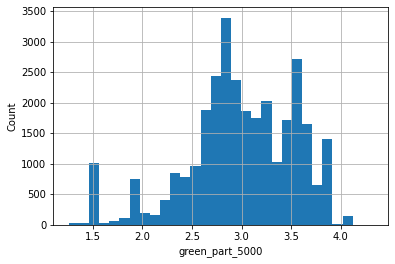

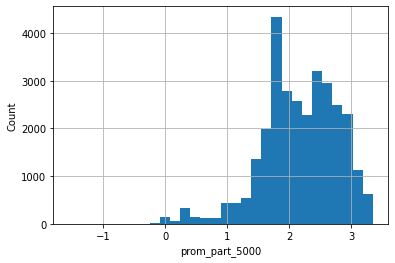

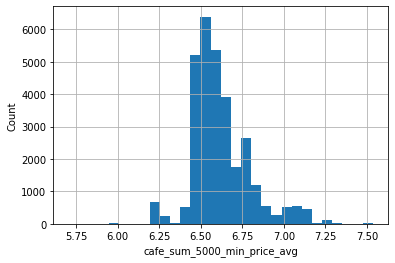

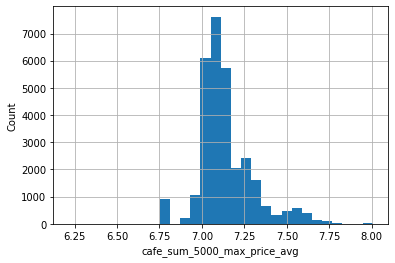

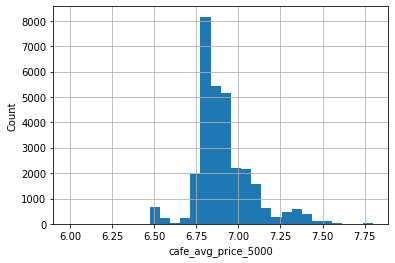

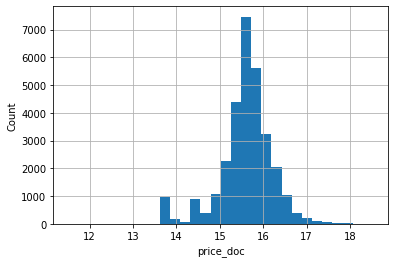

In [28]:
for feature in continuous_feature:
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature] = np.log(dataset[feature])
        dataset[feature].hist(bins=30)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()

In [29]:
dataset.describe()

full_sq       life_sq         floor     max_floor      material  \
count  30471.000000  30471.000000  30471.000000  30471.000000  30471.000000   
mean      54.214269     33.480883      7.664386     12.383381      1.567293   
std       38.031487     46.522251      5.306094      5.601542      1.285318   
min        0.000000      0.000000      0.000000      0.000000      1.000000   
25%       38.000000     22.000000      3.000000      9.000000      1.000000   
50%       49.000000     30.000000      6.500000     12.000000      1.000000   
75%       63.000000     38.000000     11.000000     16.000000      1.000000   
max     5326.000000   7478.000000     77.000000    117.000000      6.000000   

         build_year      num_room      kitch_sq         state        area_m  \
count  3.047100e+04  30471.000000  30471.000000  30471.000000  30471.000000   
mean   2.581804e+03      1.938138      6.273867      2.059401     16.298561   
std    1.148616e+05      0.706675     23.409589      0.657852      0.804704   
min    0.000000e+00      0.000000      0.000000      1.000000     14.548661   
25%    1.976000e+03      2.000000      5.000000      2.000000     15.804400   
50%    1.979000e+03      2.000000      6.000000      2.000000     16.167650   
75%    1.983000e+03      2.000000      8.000000      2.000000     16.707905   
max    2.005201e+07     19.000000   2014.000000     33.000000     19.143735   

        raion_popul  green_zone_part   indust_part  children_preschool  \
count  30471.000000     30471.000000  30471.000000        30471.000000   
mean      10.904853        -1.923874      0.118871            8.129555   
std        1.149028         0.991105      0.118688            1.095184   
min        7.842279        -6.276816      0.000000            5.164786   
25%        9.990536        -2.752704      0.019509            7.441907   
50%       11.332626        -1.786619      0.072158            8.488176   
75%       11.718817        -1.090118      0.195781            8.868273   
max       12.419041        -0.159086      0.521867            9.863863   

       preschool_quota  preschool_education_centers_raion  children_school  \
count     30471.000000                       30471.000000     30471.000000   
mean       3179.686423                           4.065111         8.149795   
std        1924.665412                           2.993795         1.130182   
min           0.000000                           0.000000         5.123964   
25%        2232.000000                           2.000000         7.355002   
50%        2854.000000                           4.000000         8.568076   
75%        3587.000000                           6.000000         8.885579   
max       11926.000000                          13.000000         9.856553   

       school_quota  school_education_centers_raion  \
count  30471.000000                    30471.000000   
mean       8.912685                        4.705031   
std        0.418270                        3.445105   
min        6.919684                        0.000000   
25%        8.738255                        2.000000   
50%        8.906122                        5.000000   
75%        9.145588                        7.000000   
max       10.116581                       14.000000   

       school_education_centers_top_20_raion  hospital_beds_raion  \
count                           30471.000000         30471.000000   
mean                                0.109678          1095.603393   
std                                 0.333328           773.176475   
min                                 0.000000             0.000000   
25%                                 0.000000           830.000000   
50%                                 0.000000           990.000000   
75%                                 0.000000          1020.000000   
max                                 2.000000          4849.000000   

       healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
count              

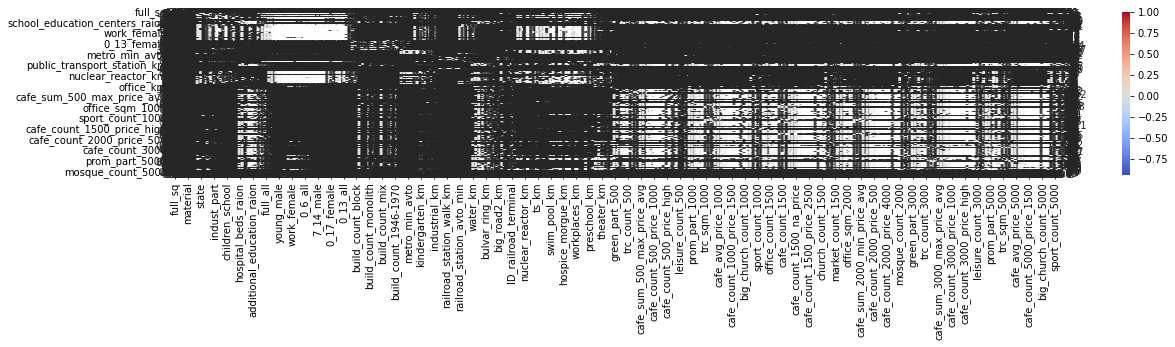

In [30]:
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (20,3)
sns.heatmap(dataset.corr(),annot= True,cmap= 'coolwarm')

In [31]:
data = dataset.drop("price_doc",axis=1)

In [32]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j] >= threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [33]:
correlation_features = correlation(dataset,0.8)
correlation_features

{'0_13_all',
 '0_13_female',
 '0_13_male',
 '0_17_all',
 '0_17_female',
 '0_17_male',
 '0_6_all',
 '0_6_female',
 '0_6_male',
 '16_29_all',
 '16_29_female',
 '16_29_male',
 '7_14_all',
 '7_14_female',
 '7_14_male',
 'big_church_count_1000',
 'big_church_count_1500',
 'big_church_count_2000',
 'big_church_count_3000',
 'big_church_count_500',
 'big_church_count_5000',
 'build_count_1921-1945',
 'build_count_after_1995',
 'build_count_before_1920',
 'build_count_mix',
 'build_count_panel',
 'build_count_slag',
 'bulvar_ring_km',
 'cafe_avg_price_1000',
 'cafe_avg_price_1500',
 'cafe_avg_price_2000',
 'cafe_avg_price_3000',
 'cafe_avg_price_500',
 'cafe_avg_price_5000',
 'cafe_count_1000',
 'cafe_count_1000_na_price',
 'cafe_count_1000_price_1000',
 'cafe_count_1000_price_1500',
 'cafe_count_1000_price_2500',
 'cafe_count_1000_price_4000',
 'cafe_count_1000_price_500',
 'cafe_count_1500',
 'cafe_count_1500_na_price',
 'cafe_count_1500_price_1000',
 'cafe_count_1500_price_1500',
 'cafe_cou

In [34]:
dataset.drop(correlation_features,axis=1,inplace=True)

In [35]:
dataset.head()

full_sq  life_sq  floor  max_floor  material  build_year  num_room  \
0       43     27.0    4.0       12.0       1.0      1979.0       2.0   
1       34     19.0    3.0       12.0       1.0      1979.0       2.0   
2       43     29.0    2.0       12.0       1.0      1979.0       2.0   
3       89     50.0    9.0       12.0       1.0      1979.0       2.0   
4       77     77.0    4.0       12.0       1.0      1979.0       2.0   

   kitch_sq  state product_type     area_m  raion_popul  green_zone_part  \
0       6.0    2.0   Investment  15.672992    11.954864        -1.662168   
1       6.0    2.0   Investment  16.076162    11.655744        -0.987244   
2       6.0    2.0   Investment  15.385848    11.529861        -2.184272   
3       6.0    2.0   Investment  16.347900    12.092193        -1.636281   
4       6.0    2.0   Investment  15.943559    11.591469        -4.184242   

   indust_part  preschool_quota  preschool_education_centers_raion  \
0     0.000070           5001.0                                  5   
1     0.049637           3119.0                                  5   
2     0.118537           1463.0                                  4   
3     0.069753           6839.0                                  9   
4     0.037316           3240.0                                  7   

   school_education_centers_top_20_raion  hospital_beds_raion  \
0                                      0                240.0   
1                                      0                229.0   
2                                      0               1183.0   
3                                      0                990.0   
4                                      0                562.0   

   healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
0                         1                        0                    7   
1                         1                        0                    6   
2                         1                        0                    5   
3                         1                        0                   17   
4                         4                        2                   25   

   additional_education_raion culture_objects_top_25  \
0                           3                     no   
1                           1                    yes   
2                           1                     no   
3                           6                     no   
4                           2                     no   

   culture_objects_top_25_raion  shopping_centers_raion  \
0                             0                      16   
1                             1                       3   
2                             0                       0   
3                             0                      11   
4                             0                      10   

  thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
0                        no                 no                  no   
1                        no                 no                  no   
2                        no                 no                  no   
3                        no                 no                  no   
4                        no                 no                  no   

  radiation_raion railroad_terminal_raion big_market_raion  \
0              no                      no               no   
1              no                      no               no   
2             yes                      no               no   
3              no                      no               no   
4             yes                     yes               no   

  nuclear_reactor_raion detention_facility_raion   full_all  \
0                    no                       no  11.364495   
1                    no                       no  11.242218   
2                    no                       no  11.532552   
3                    no                       no   9.959632   
4                    no        

In [36]:
dataset.shape

(30471, 128)

In [37]:
categorical_feature

['product_type',
 'culture_objects_top_25',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'water_1line',
 'big_road1_1line',
 'railroad_1line',
 'ecology']

In [38]:
feat = dataset[categorical_feature]
feat

product_type culture_objects_top_25 thermal_power_plant_raion  \
0         Investment                     no                        no   
1         Investment                    yes                        no   
2         Investment                     no                        no   
3         Investment                     no                        no   
4         Investment                     no                        no   
...              ...                    ...                       ...   
30466     Investment                     no                        no   
30467     Investment                    yes                        no   
30468  OwnerOccupier                     no                        no   
30469     Investment                     no                        no   
30470     Investment                     no                        no   

      incineration_raion oil_chemistry_raion radiation_raion  \
0                     no                  no              no   
1                     no                  no              no   
2                     no                  no             yes   
3                     no                  no              no   
4                     no                  no             yes   
...                  ...                 ...             ...   
30466                yes                  no             yes   
30467                 no                  no             yes   
30468                 no                  no              no   
30469                 no                  no             yes   
30470                 no                  no             yes   

      railroad_terminal_raion big_market_raion nuclear_reactor_raion  \
0                          no               no                    no   
1                          no               no                    no   
2                          no               no                    no   
3                          no               no                    no   
4                         yes               no                    no   
...                       ...              ...                   ...   
30466                      no               no                    no   
30467                     yes               no                    no   
30468                      no               no                    no   
30469                      no               no                    no   
30470                      no               no                    no   

      detention_facility_raion water_1line big_road1_1line railroad_1line  \
0                           no          no              no             no   
1                           no          no              no             no   
2                           no          no              no             no   
3                           no          no              no             no   
4                           no          no              no            yes   
...                        ...         ...             ...            ...   
30466                       no          no              no             no   
30467                      yes          no              no             no   
30468                       no          no              no             no   
30469                       no          no              no             no   
30470                       no          no              no             no   

            ecology  
0              good  
1         excellent  
2              poor  
3              good  
4         excellent  
...             ...  
30466          good  
30467          poor  
30468       no data  
30469  satisfactory  
30470          poor  

[30471 rows x 14 columns]

In [39]:
for feature in categorical_feature:
  dataset[feature] = pd.get_dummies(dataset[feature],drop_first=True)

In [40]:
dataset

full_sq  life_sq  floor  max_floor  material  build_year  num_room  \
0           43     27.0    4.0       12.0       1.0      1979.0       2.0   
1           34     19.0    3.0       12.0       1.0      1979.0       2.0   
2           43     29.0    2.0       12.0       1.0      1979.0       2.0   
3           89     50.0    9.0       12.0       1.0      1979.0       2.0   
4           77     77.0    4.0       12.0       1.0      1979.0       2.0   
...        ...      ...    ...        ...       ...         ...       ...   
30466       44     27.0    7.0        9.0       1.0      1975.0       2.0   
30467       86     59.0    3.0        9.0       2.0      1935.0       4.0   
30468       45     30.0   10.0       20.0       1.0      1979.0       1.0   
30469       64     32.0    5.0       15.0       1.0      2003.0       2.0   
30470       43     28.0    1.0        9.0       1.0      1968.0       2.0   

       kitch_sq  state  product_type     area_m  raion_popul  green_zone_part  \
0           6.0    2.0             0  15.672992    11.954864        -1.662168   
1           6.0    2.0             0  16.076162    11.655744        -0.987244   
2           6.0    2.0             0  15.385848    11.529861        -2.184272   
3           6.0    2.0             0  16.347900    12.092193        -1.636281   
4           6.0    2.0             0  15.943559    11.591469        -4.184242   
...         ...    ...           ...        ...          ...              ...   
30466       6.0    3.0             0  16.123387    12.075497        -2.340596   
30467      10.0    3.0             0  15.804400    11.230257        -2.726556   
30468       1.0    1.0             1  17.055611     8.294300        -0.700544   
30469      11.0    2.0             0  15.615580    11.272331        -1.786619   
30470       6.0    2.0             0  15.296054    11.457000        -2.752704   

       indust_part  preschool_quota  preschool_education_centers_raion  \
0         0.000070           5001.0                                  5   
1         0.049637           3119.0                                  5   
2         0.118537           1463.0                                  4   
3         0.069753           6839.0                                  9   
4         0.037316           3240.0                                  7   
...            ...              ...                                ...   
30466     0.300323           5088.0                                  4   
30467     0.000078           1874.0                                  4   
30468     0.007122           2854.0                                  0   
30469     0.093443           2372.0                                  6   
30470     0.038693           2215.0                                  4   

       school_education_centers_top_20_raion  hospital_beds_raion  \
0                                          0                240.0   
1                                          0                229.0   
2                                          0               1183.0   
3                                          0                990.0   
4                                          0                562.0   
...                                      ...                  ...   
30466                                      0                990.0   
30467                                      1               1046.0   
30468                                      0                990.0   
30469                                      0               3300.0   
30470                                      0               1015.0   

       healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
0                             1                        0                    7   
1                             1                        0                    6   
2                             1                        0                    5   
3                             1                        0           

In [41]:
dataset.isnull().sum()

full_sq                                  0
life_sq                                  0
floor                                    0
max_floor                                0
material                                 0
build_year                               0
num_room                                 0
kitch_sq                                 0
state                                    0
product_type                             0
area_m                                   0
raion_popul                              0
green_zone_part                          0
indust_part                              0
preschool_quota                          0
preschool_education_centers_raion        0
school_education_centers_top_20_raion    0
hospital_beds_raion                      0
healthcare_centers_raion                 0
university_top_20_raion                  0
sport_objects_raion                      0
additional_education_raion               0
culture_objects_top_25                   0
culture_obj

In [42]:
cor = dataset.corr()
cor

full_sq   life_sq     floor  \
full_sq                                1.000000  0.151406  0.089085   
life_sq                                0.151406  1.000000  0.032337   
floor                                  0.089085  0.032337  1.000000   
max_floor                              0.057650  0.033413  0.371492   
material                               0.017168  0.014049 -0.019545   
build_year                            -0.002632 -0.002229  0.000363   
num_room                               0.333761  0.170746 -0.002176   
kitch_sq                               0.009695  0.003408 -0.007286   
state                                 -0.039139 -0.048718 -0.088592   
product_type                           0.100806  0.077437  0.205649   
area_m                                 0.050119  0.033210  0.042733   
raion_popul                           -0.040027 -0.042231 -0.060489   
green_zone_part                        0.027958  0.021510  0.025397   
indust_part                           -0.053589 -0.033320 -0.017517   
preschool_quota                       -0.006588 -0.015601  0.044209   
preschool_education_centers_raion     -0.010669 -0.030312  0.013758   
school_education_centers_top_20_raion  0.020713  0.007090 -0.009693   
hospital_beds_raion                   -0.002416  0.000628 -0.079173   
healthcare_centers_raion              -0.007840 -0.014992 -0.076201   
university_top_20_raion                0.045654  0.022349  0.001377   
sport_objects_raion                    0.028109  0.007171 -0.035449   
additional_education_raion             0.007401 -0.001210  0.044499   
culture_objects_top_25                 0.030546  0.020976  0.003647   
culture_objects_top_25_raion           0.026174  0.020758  0.014785   
shopping_centers_raion                 0.010188  0.002114  0.016302   
thermal_power_plant_raion             -0.021703 -0.014267 -0.061405   
incineration_raion                     0.004011 -0.008691  0.105780   
oil_chemistry_raion                   -0.021762 -0.011180 -0.041946   
radiation_raion                       -0.014905 -0.020738 -0.095654   
railroad_terminal_raion                0.021798  0.016603 -0.007860   
big_market_raion                       0.006169 -0.002550  0.015300   
nuclear_reactor_raion                 -0.015184 -0.010287 -0.026317   
detention_facility_raion              -0.002743 -0.002303  0.016235   
full_all                              -0.009213 -0.033559 -0.009189   
raion_build_count_with_material_info  -0.034162 -0.020334 -0.080961   
build_count_block                     -0.062157 -0.034433 -0.146023   
build_count_wood                       0.002517 -0.008564  0.017949   
build_count_frame                      0.003564  0.000340  0.028029   
build_count_brick                      0.020831  0.017706 -0.086061   
build_count_monolith                   0.047051  0.017300  0.028983   
build_count_foam                      -0.001438 -0.002355 -0.018045   
build_count_1946-1970                 -0.037991 -0.017160 -0.146781   
build_count_1971-1995                 -0.035825 -0.025062 -0.016921   
ID_metro                               0.037135  0.017931 -0.030353   
metro_min_avto                         0.032312  0.017618 -0.073204   
kindergarten_km                        0.067936  0.041980  0.096096   
school_km                              0.055201  0.029299 -0.079015   
park_km                                0.012534  0.009004  0.001483   
green_zone_km                         -0.009260 -0.003926  0.039678   
industrial_km                          0.028438  0.009645 -0.040100   
water_treatment_km                     0.003366  0.002706 -0.092338   
cemetery_km                            0.016447  0.004501  0.033526   
incineration_km                        0.036739  0.036287 -0.043796   
railroad_station_walk_km               0.043590  0.032653  0.043893   
ID_railroad_station_walk               0.022894  0.005732 -0.040834   
ID_railroad_station_avto               0.026217  0.011562 -0.045

In [43]:
a = abs(cor['price_doc'])
result = abs(a[a>0.5])
result

price_doc    1.0
Name: price_doc, dtype: float64

In [44]:
imp_feature = []
for i in range(0,len(result)):
  if result.iloc[i] > 0.1:
    print(result[i])
    imp_feature.append(result[i])

1.0


In [45]:
len(imp_feature)

1

In [46]:
data = dataset.copy()

In [47]:
X = data.drop('price_doc',axis=1)
Y = data['price_doc']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=50)

[08:02:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature Importances :  [0.07982232 0.00254484 0.00773427 0.0052729  0.         0.01471151
 0.02543452 0.00726057 0.01241985 0.00937434 0.00235308 0.00705496
 0.00643179 0.01357419 0.00615864 0.         0.         0.00650139
 0.00326803 0.00225154 0.03283758 0.0035139  0.         0.
 0.01110798 0.00654829 0.         0.         0.00917876 0.0042989
 0.00340955 0.         0.         0.00676555 0.         0.01250613
 0.         0.00339977 0.01068989 0.02715931 0.00584852 0.
 0.         0.00514475 0.02427272 0.00484513 0.01914736 0.00481055
 0.00851188 0.01037794 0.00840618 0.00819674 0.00768384 0.00419452
 0.00257981 0.01266842 0.00693618 0.0037121  0.         0.01171871
 0.03224736 0.00394296 0.         0.         0.00360305 0.00485354
 0.00647525 0.         0.00394021 0.00562325 0.00582214 0.01382633
 0.02661747 0.00613565 0.02004666 0.00608713 0.00632482 0.00768

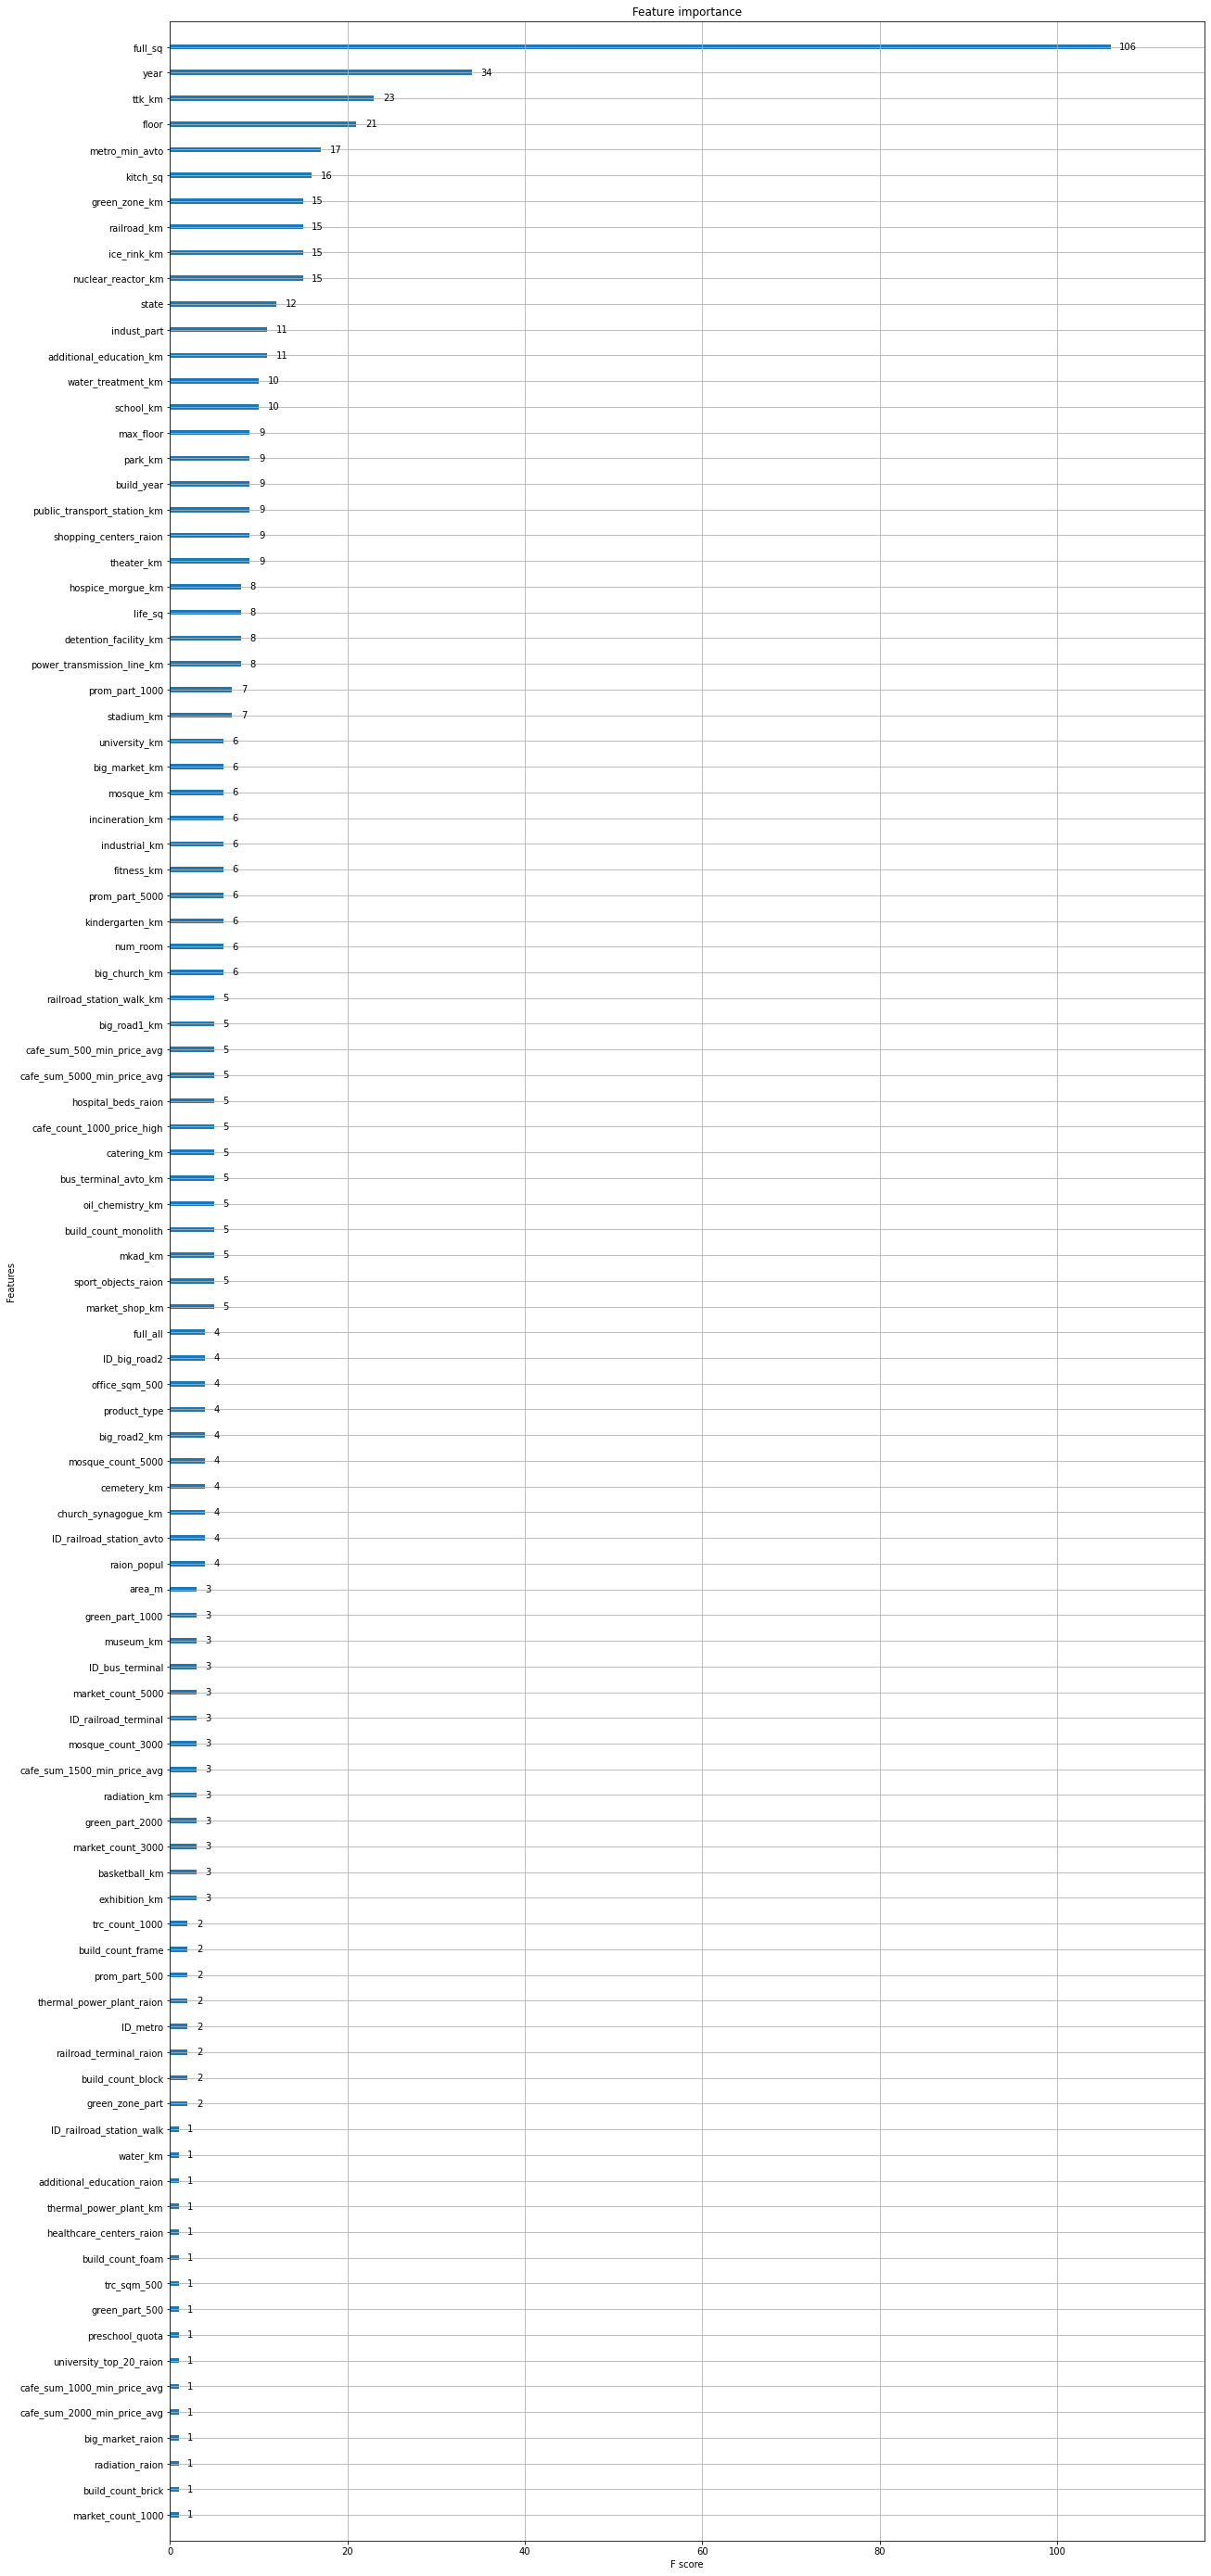

In [49]:
from xgboost import XGBRegressor
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBRegressor(n_estimators=100)
xgb_model.fit(X_train, Y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plt.rcParams["figure.figsize"] = (20,50)
plot_importance(xgb_model)
plt.show()

In [50]:
sorted_idx = np.argsort(xgb_model.feature_importances_)[::-1]

In [51]:
temp = []
for index in sorted_idx:
    print([X_train.columns[index], xgb_model.feature_importances_[index]])
    temp.append([X_train.columns[index], xgb_model.feature_importances_[index]])

['full_sq', 0.07982232]
['exhibition_km', 0.059694104]
['sport_objects_raion', 0.032837577]
['ttk_km', 0.032247357]
['build_count_monolith', 0.027159309]
['nuclear_reactor_km', 0.026617466]
['num_room', 0.025434522]
['metro_min_avto', 0.024272725]
['basketball_km', 0.023132607]
['stadium_km', 0.020845272]
['power_transmission_line_km', 0.02004666]
['school_km', 0.019147355]
['year', 0.018058574]
['build_year', 0.014711511]
['oil_chemistry_km', 0.013826333]
['indust_part', 0.013574192]
['ID_railroad_station_avto', 0.012668421]
['build_count_block', 0.012506131]
['mosque_count_5000', 0.0124619305]
['state', 0.012419847]
['big_church_km', 0.012177655]
['mkad_km', 0.01171871]
['shopping_centers_raion', 0.01110798]
['build_count_brick', 0.010689885]
['mosque_count_3000', 0.010634406]
['cafe_sum_1000_min_price_avg', 0.010552892]
['industrial_km', 0.010377942]
['cafe_count_1000_price_high', 0.010321914]
['catering_km', 0.0101072965]
['theater_km', 0.009809209]
['fitness_km', 0.009659609]
['ca

In [52]:
temp

[['full_sq', 0.07982232],
 ['exhibition_km', 0.059694104],
 ['sport_objects_raion', 0.032837577],
 ['ttk_km', 0.032247357],
 ['build_count_monolith', 0.027159309],
 ['nuclear_reactor_km', 0.026617466],
 ['num_room', 0.025434522],
 ['metro_min_avto', 0.024272725],
 ['basketball_km', 0.023132607],
 ['stadium_km', 0.020845272],
 ['power_transmission_line_km', 0.02004666],
 ['school_km', 0.019147355],
 ['year', 0.018058574],
 ['build_year', 0.014711511],
 ['oil_chemistry_km', 0.013826333],
 ['indust_part', 0.013574192],
 ['ID_railroad_station_avto', 0.012668421],
 ['build_count_block', 0.012506131],
 ['mosque_count_5000', 0.0124619305],
 ['state', 0.012419847],
 ['big_church_km', 0.012177655],
 ['mkad_km', 0.01171871],
 ['shopping_centers_raion', 0.01110798],
 ['build_count_brick', 0.010689885],
 ['mosque_count_3000', 0.010634406],
 ['cafe_sum_1000_min_price_avg', 0.010552892],
 ['industrial_km', 0.010377942],
 ['cafe_count_1000_price_high', 0.010321914],
 ['catering_km', 0.0101072965],
 [

In [53]:
not_imp_feature = []
for i in range(50,len(temp)):
  not_imp_feature.append(temp[i][0])

In [54]:
len(not_imp_feature)

77

In [55]:
X_train.drop(not_imp_feature,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
X_test.drop(not_imp_feature,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
X_test.shape

(9142, 50)

In [62]:
X_train.to_csv('train_data.csv')
X_test.to_csv('test_data.csv')

In [63]:
Y_train.to_csv('ytrain_data.csv')
Y_test.to_csv('ytest_data.csv')
